### Houseing Price Prediction:

In [56]:

#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [57]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [58]:
#importing train dataset
df = pd.read_csv(r"C:\Users\youra\OneDrive\Desktop\SAI_dsp35\Datatrained\DataTrained\Flip Robo\10-07-2022\train.csv") #Reading csv file
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [59]:
#importing test dataset
dff = pd.read_csv(r"C:\Users\youra\OneDrive\Desktop\SAI_dsp35\Datatrained\DataTrained\Flip Robo\10-07-2022\test.csv") 
dff.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

### Exploratory Data Analysis:

In [60]:
#Checking shape of my train dataset
df.shape

(1168, 81)

In [61]:
#Checking shape of my test dataset
dff.shape

(292, 80)

In [62]:
#Checking all column names of train dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
#Checking all column names of test dataset
dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
#Checking the data types of all columns in train dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [65]:
#Checking the data types of all columns in test dataset
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [66]:
#Checking the info about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [67]:
#Dropping unnecessary columns in train dataset
df = df.drop(["Alley"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Fence"],axis=1)
df = df.drop(["MiscFeature"],axis=1)

In [68]:
#Checking the info about the test dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [69]:
#Dropping unnecessary columns in test dataset
dff = dff.drop(["Alley"],axis=1)
dff = dff.drop(["PoolQC"],axis=1)
dff = dff.drop(["Fence"],axis=1)
dff = dff.drop(["MiscFeature"],axis=1)

In [70]:
#Checking unique values of each column in train dataset
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

In [71]:
#Droping unnecessary columns in train dataset
df = df.drop(["Id"],axis=1)
df = df.drop(["Utilities"],axis=1)

In [72]:
#Checking unique values of each column in test dataset
dff.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath       3
BsmtHalfBath 

In [73]:
#Droping unnecessary columns in test dataset
dff = dff.drop(["Id"],axis=1)
dff = dff.drop(["Utilities"],axis=1)

In [74]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in train dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
68.0      16
24.0      16
79.0      14
64.0      14
21.0      14
55.0      13
72.0      13
51.0      13
100.0     12
59.0      12
82.0      12
71.0      11
63.0      11
74.0      11
88.0      10
69.0      10
66.0      10
53.0      10
67.0       9
34.0       9
84.0       9
43.0       8
92.0       8
52.0       8
77.0       8
76.0       8
40.0       8
95.0       7
62.0       7
86.0       7
61.0       7
57.0       7
35.0       7
96.0       6
94.0       6
120.0      6
44.0       6
54.0   

0.0       692
72.0        7
120.0       6
180.0       6
106.0       5
84.0        5
108.0       5
80.0        5
320.0       4
40.0        4
132.0       4
360.0       4
300.0       4
336.0       4
340.0       4
178.0       4
168.0       4
220.0       4
210.0       4
246.0       4
160.0       4
288.0       4
100.0       4
216.0       4
16.0        4
350.0       3
256.0       3
170.0       3
104.0       3
99.0        3
130.0       3
186.0       3
128.0       3
252.0       3
174.0       3
200.0       3
110.0       3
456.0       3
183.0       3
85.0        3
82.0        3
70.0        3
208.0       3
182.0       2
45.0        2
166.0       2
424.0       2
420.0       2
164.0       2
212.0       2
272.0       2
268.0       2
169.0       2
344.0       2
245.0       2
189.0       2
203.0       2
206.0       2
144.0       2
240.0       2
18.0        2
145.0       2
243.0       2
113.0       2
90.0        2
306.0       2
140.0       2
362.0       2
157.0       2
125.0       2
117.0       2
50.0  

In [75]:
#Dropping unnecessary columns in test dataset
dff.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [76]:
#Checking null values in the train dataset
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

In [77]:
#Checking null values in the test dataset
dff.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

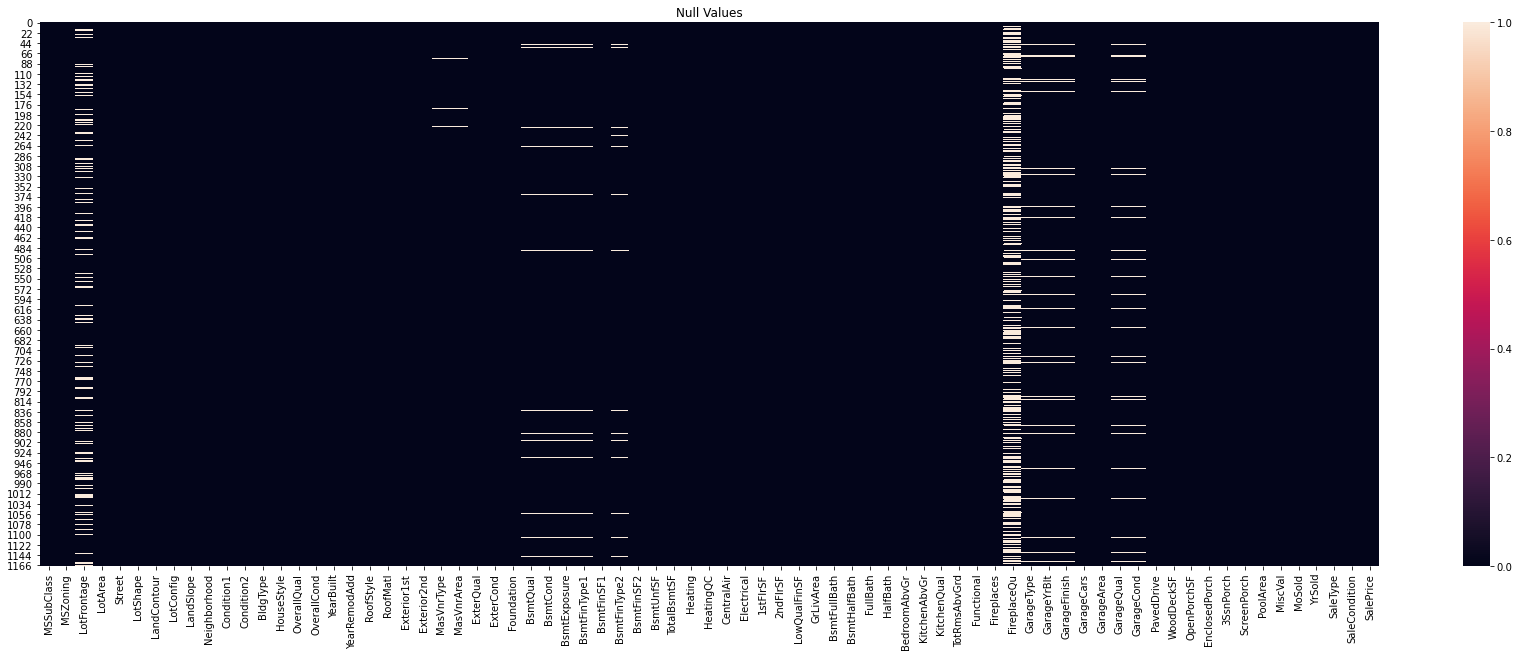

In [78]:
#Visualizeing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

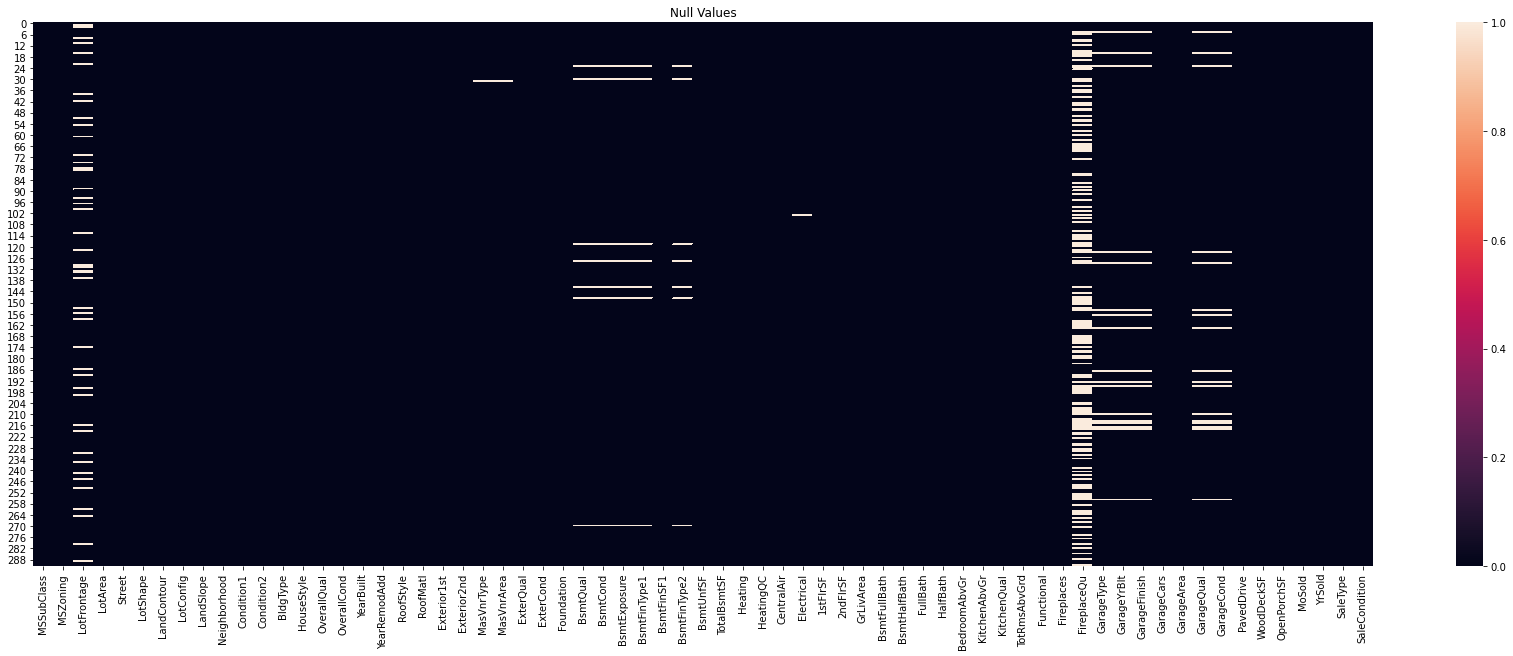

In [79]:
#Visualizeing null values in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()


### Imputation technique to replace nan values:

In [80]:
#Creating a list of categorical and numerical datatypes in train dataset
df_categorical=[]
df_numerical=[]
for col in df.columns:
    if (df[col].dtype=='object'):
          df_categorical.append(col)
    else:
        df_numerical.append(col)

In [81]:
#Creating a list of categorical and numerical datatypes in test dataset
dff_categorical=[]
dff_numerical=[]
for col in dff.columns:
    if (dff[col].dtype=='object'):
          dff_categorical.append(col)
    else:
        dff_numerical.append(col)

In [82]:
#Replacing null values of categorical column with mode of that column in train dataset.
catcol=df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)

In [83]:
#Replacing null values of categorical column with mode of that column in test dataset.
catcol1=dff.columns.values
for i in range(0,len(catcol1)):
    if dff[catcol1[i]].dtype == "object":
        dff[catcol1[i]].fillna(dff[catcol1[i]].mode()[0], inplace=True)

In [84]:
#Replacing null values of numerical column with mean of that column in train dataset.
numcol=df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)

In [85]:
#Replacing null values of numerical column with mean of that column in test dataset.
numcol1=dff.columns.values
for i in range(0,len(numcol1)):
    if dff[numcol1[i]].dtype != "object":
        dff[numcol1[i]].fillna(dff[numcol1[i]].mean(), inplace=True)

In [86]:
#Checking null values again in train dataset
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [87]:
#Checking null values again in test dataset
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

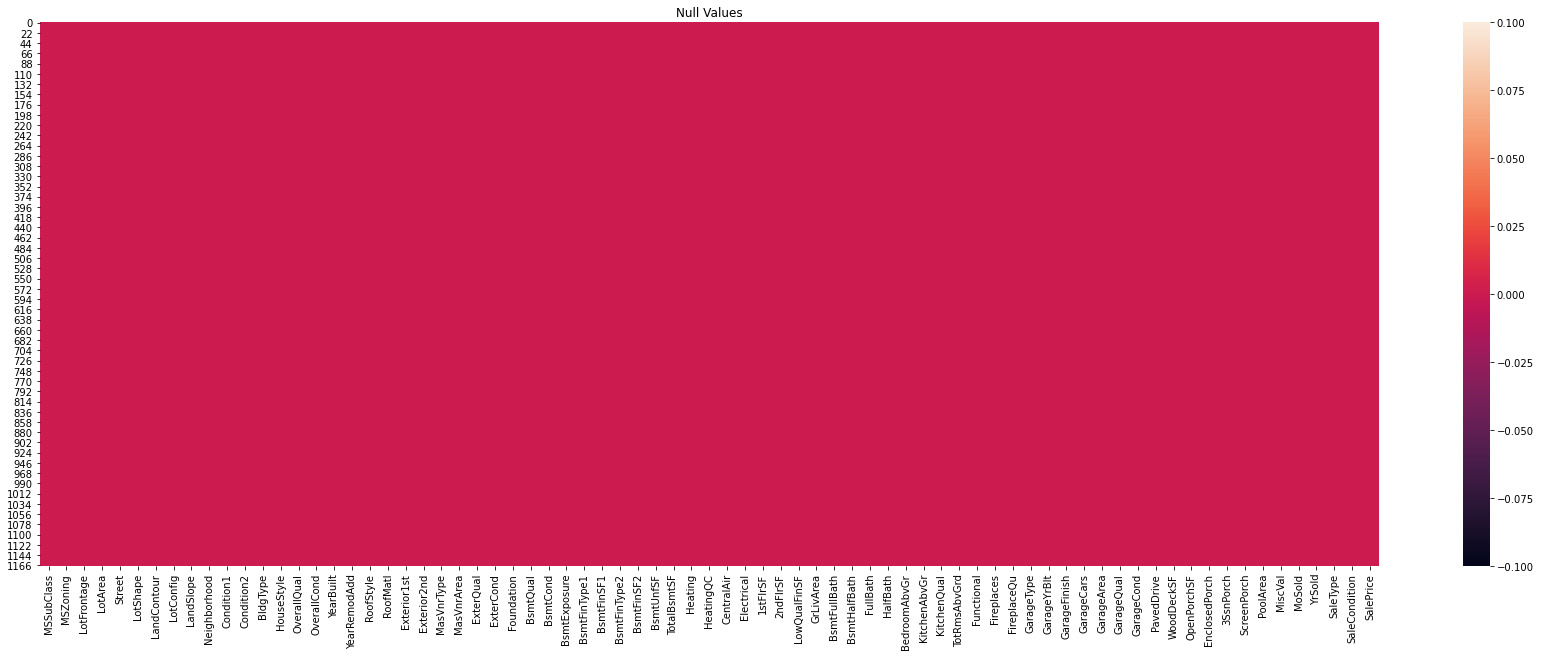

In [88]:
#Visualizeing null values again after imputation in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

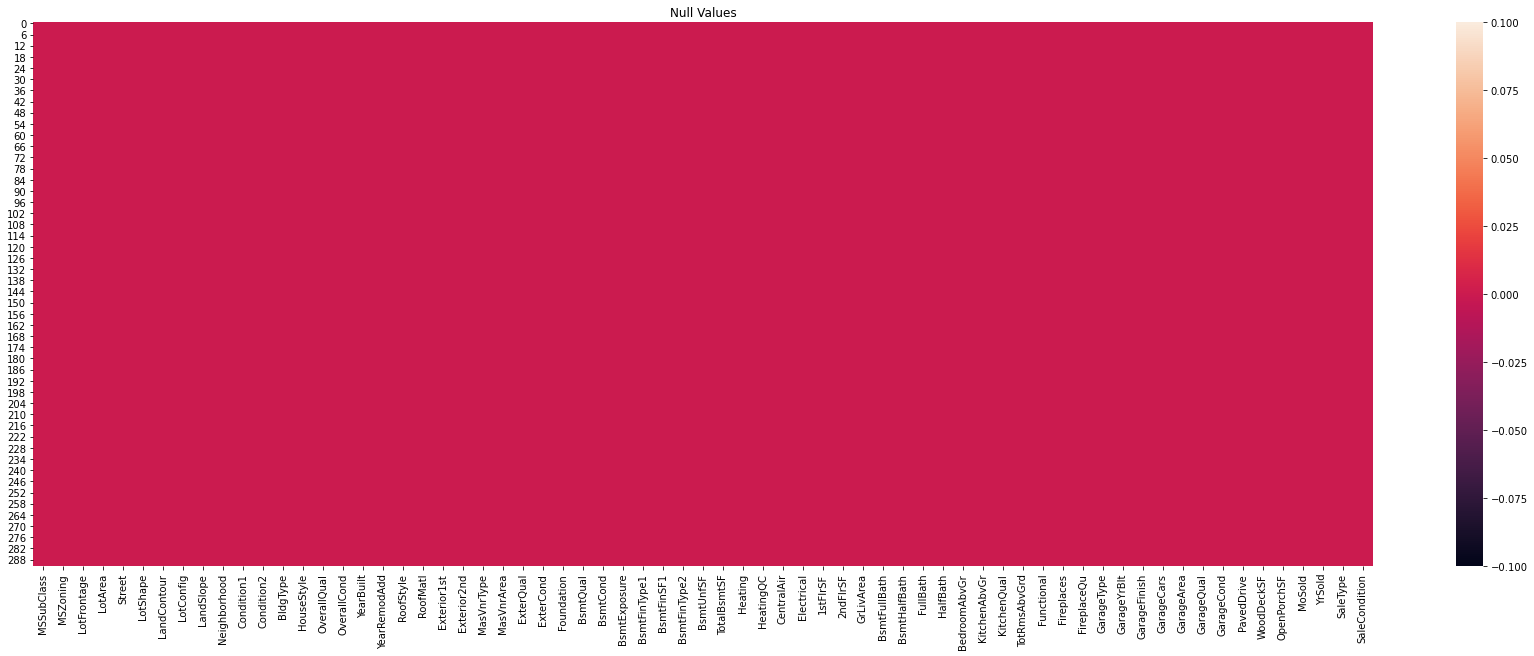

In [89]:
#Visualizeing null values again after imputation in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

In [90]:
#Checking for empty observations in target column
df.loc[df['SalePrice'] == " "]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

### Feature Extraction:

In [91]:
# Converting years column to age column in train dataset
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [92]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [93]:
# Converting years column to age column in test dataset
dff['Year_SinceBuilt'] = dff['YearBuilt'].max() - dff['YearBuilt']
dff['Year_SinceRemodAdded'] = dff['YearRemodAdd'].max() - dff['YearRemodAdd']
dff['Year_SinceSold'] = dff['YrSold'].max() - dff['YrSold']
dff['GarageAge'] = dff['GarageYrBlt'].max() - dff['GarageYrBlt']

In [94]:
# Dropping old columns in test dataset
dff.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [95]:
#Checking description of data set in train dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027    46.647260   569.721747  1061.095034   
std     182.047152   462.664785   163.520016   449.375525   442.272249   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   216.000000   799.000000   
50%       0.000000   385.500000     0.000000   474.000000  1005.500000   
75%     160.000000   714.500000     0.000000   816.000000  1291.500000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1168.000000  1168.000000   1168.000000  1168.000000   1168.000000   
mean   1169.860445   348.826199      6.380137  1525.066781      0.425514   
std     391.161983   439.696370     50.892844   528.042957      0.521615   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     892.000000     0.000000      0.000000  1143.250000      0.000000   
50%    1096.500000     0.000000      0.000000  1468.500000      0.000000   
75%    1392.000000   729.000000      0.000000  1795.000000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1168.000000  1168.000000  1168.000000   1168.000000   1168.000000   
mean       0.055651     1.562500     0.388699      2.884418      1.045377   
std        0.236699     0.551882     0.504929      0.817229      0.216292   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean       6.542808     0.617295     1.776541   476.860445    96.206336   
std        1.598484     0.650575     0.745554   214.466769   126.158988   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   338.000000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   171.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.559932      23.015411     3.639555    15.051370     3.448630   
std      66.381023      63.191089    29.088867    55.080816    44.896939   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      24.000000       0.000000     0.000000     0.000000     0.000000   
75%      70.000000       0.000000     0.000000     0.000000     0.000

In [96]:
#Checking description of data set in test dataset
dff.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

       Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold   GarageAge  
count       292.000000            292.000000      292.000000  292.000000  
mean         36.383562             24.705479        2.140411   30.240000  
std          30.447016             20.105792        1.322867   23.161183  
min           0.000000              0.000000        0.000000    0.000000  
25%           8.000000              6.750000        1.000000    8.000000  
50%          33.000000             16.000000        2.000000   30.240000  
75%          55.000000             42.000000        3.000000   45.000000  
max         137.000000             60.000000        4.000000   94.000000

### Visualization:


### Univariate Analysis:

In [97]:
# checking for categorical columns in train dataset
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [98]:
# checking for categorical columns in test dataset
categorical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [99]:
# Now checking for numerical columns in train dataset
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


In [100]:
# Now checking for numerical columns in test dataset
numerical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


### Univariate analysis for numerical columns:

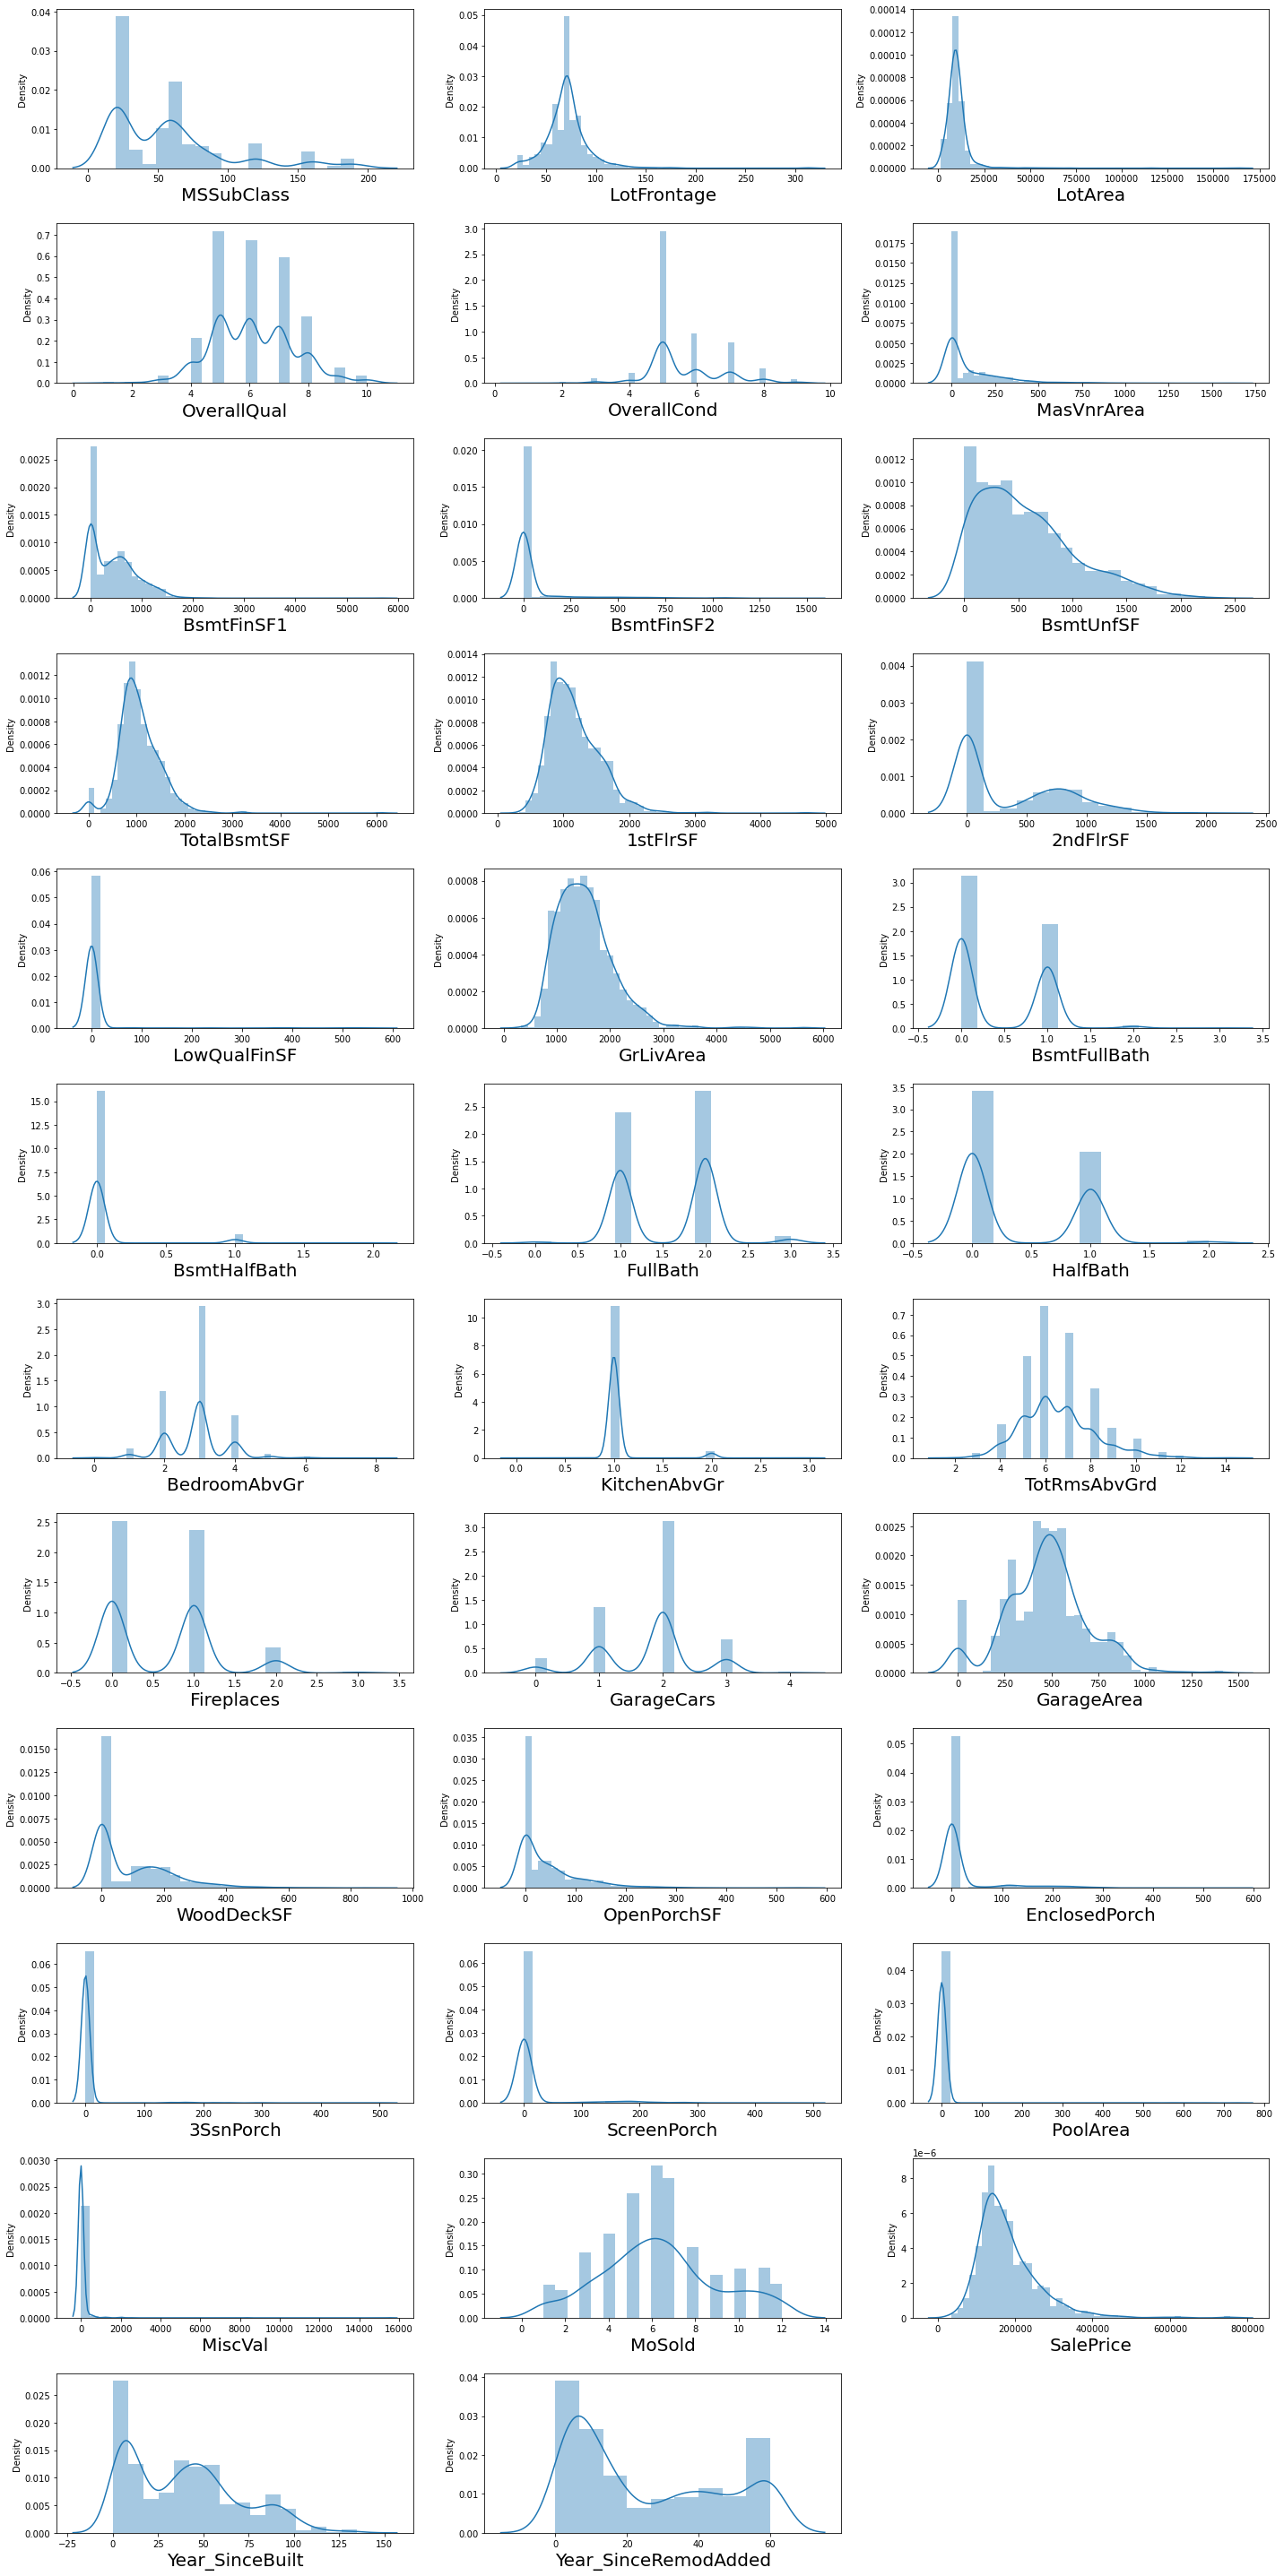

In [101]:
#Distribution plot for all numerical columns
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

### Univariate analysis for categorical columns:

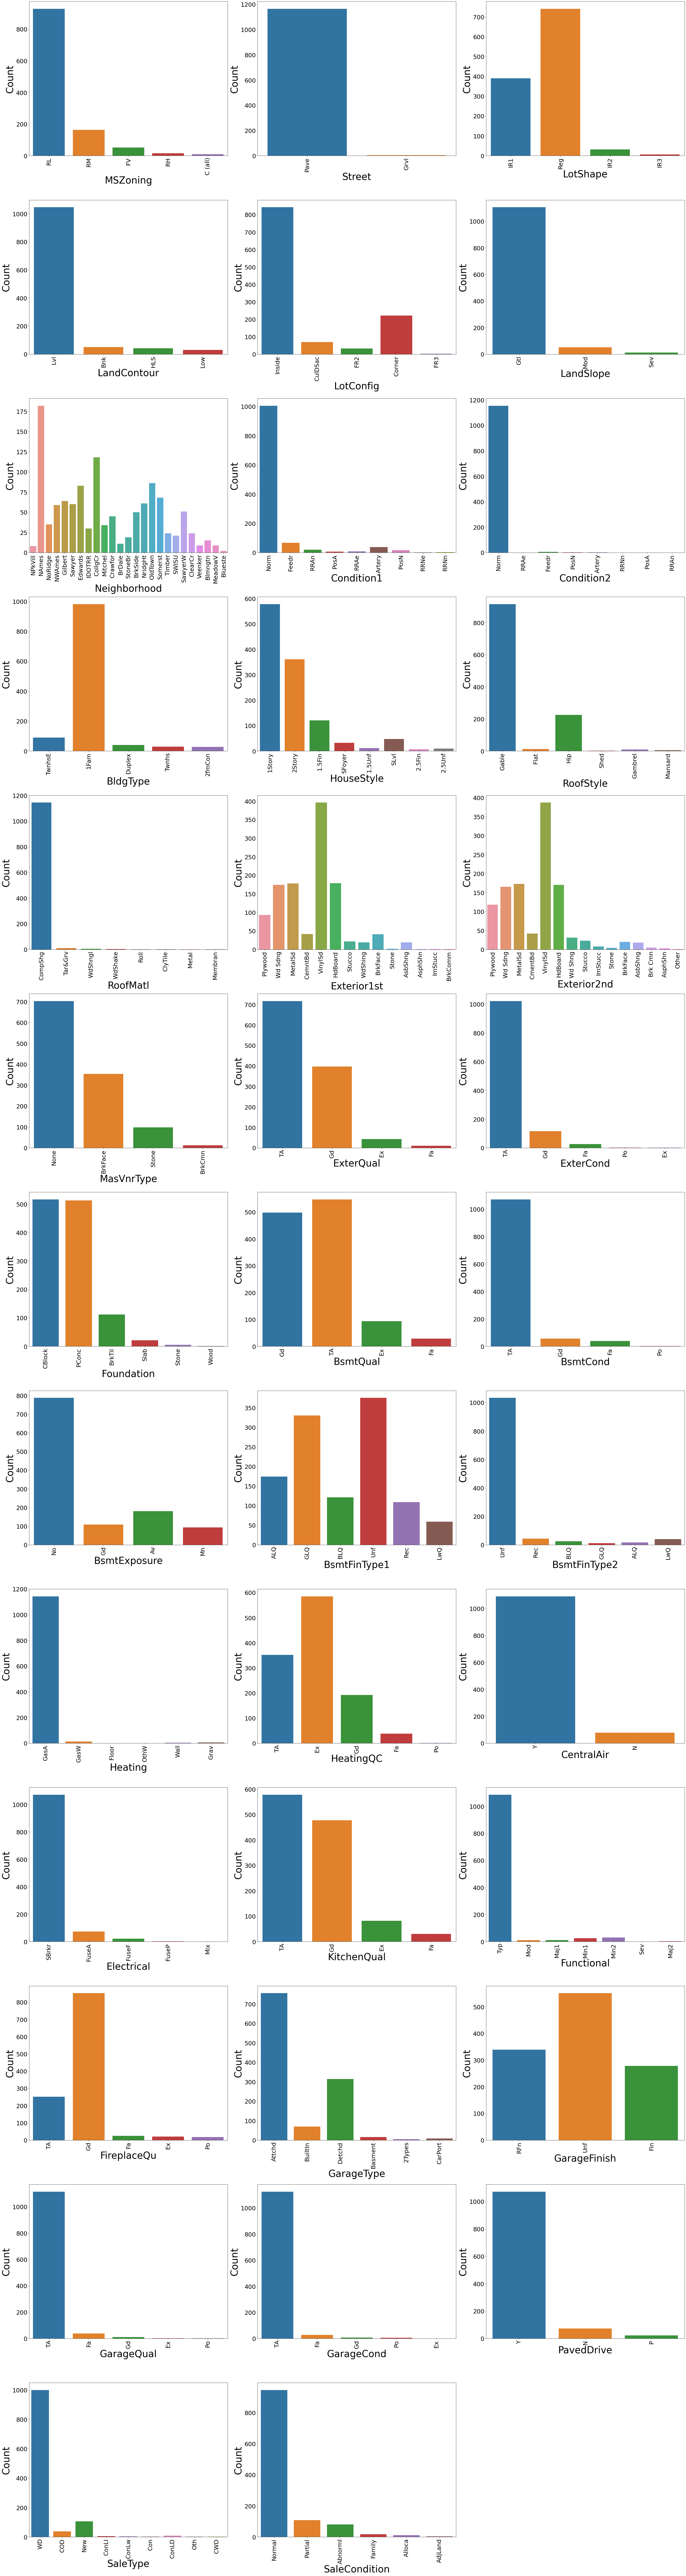

In [102]:
#Bar plot for all categorical columns
plt.figure(figsize = (40,150))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 25)
        plt.yticks(rotation=0,fontsize = 25)
        plt.xlabel(column,fontsize = 40)
        plt.ylabel('Count',fontsize = 40)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis:

### Bivariate Analysis for numerical columns:

In [103]:
col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded','Year_SinceSold','GarageAge']

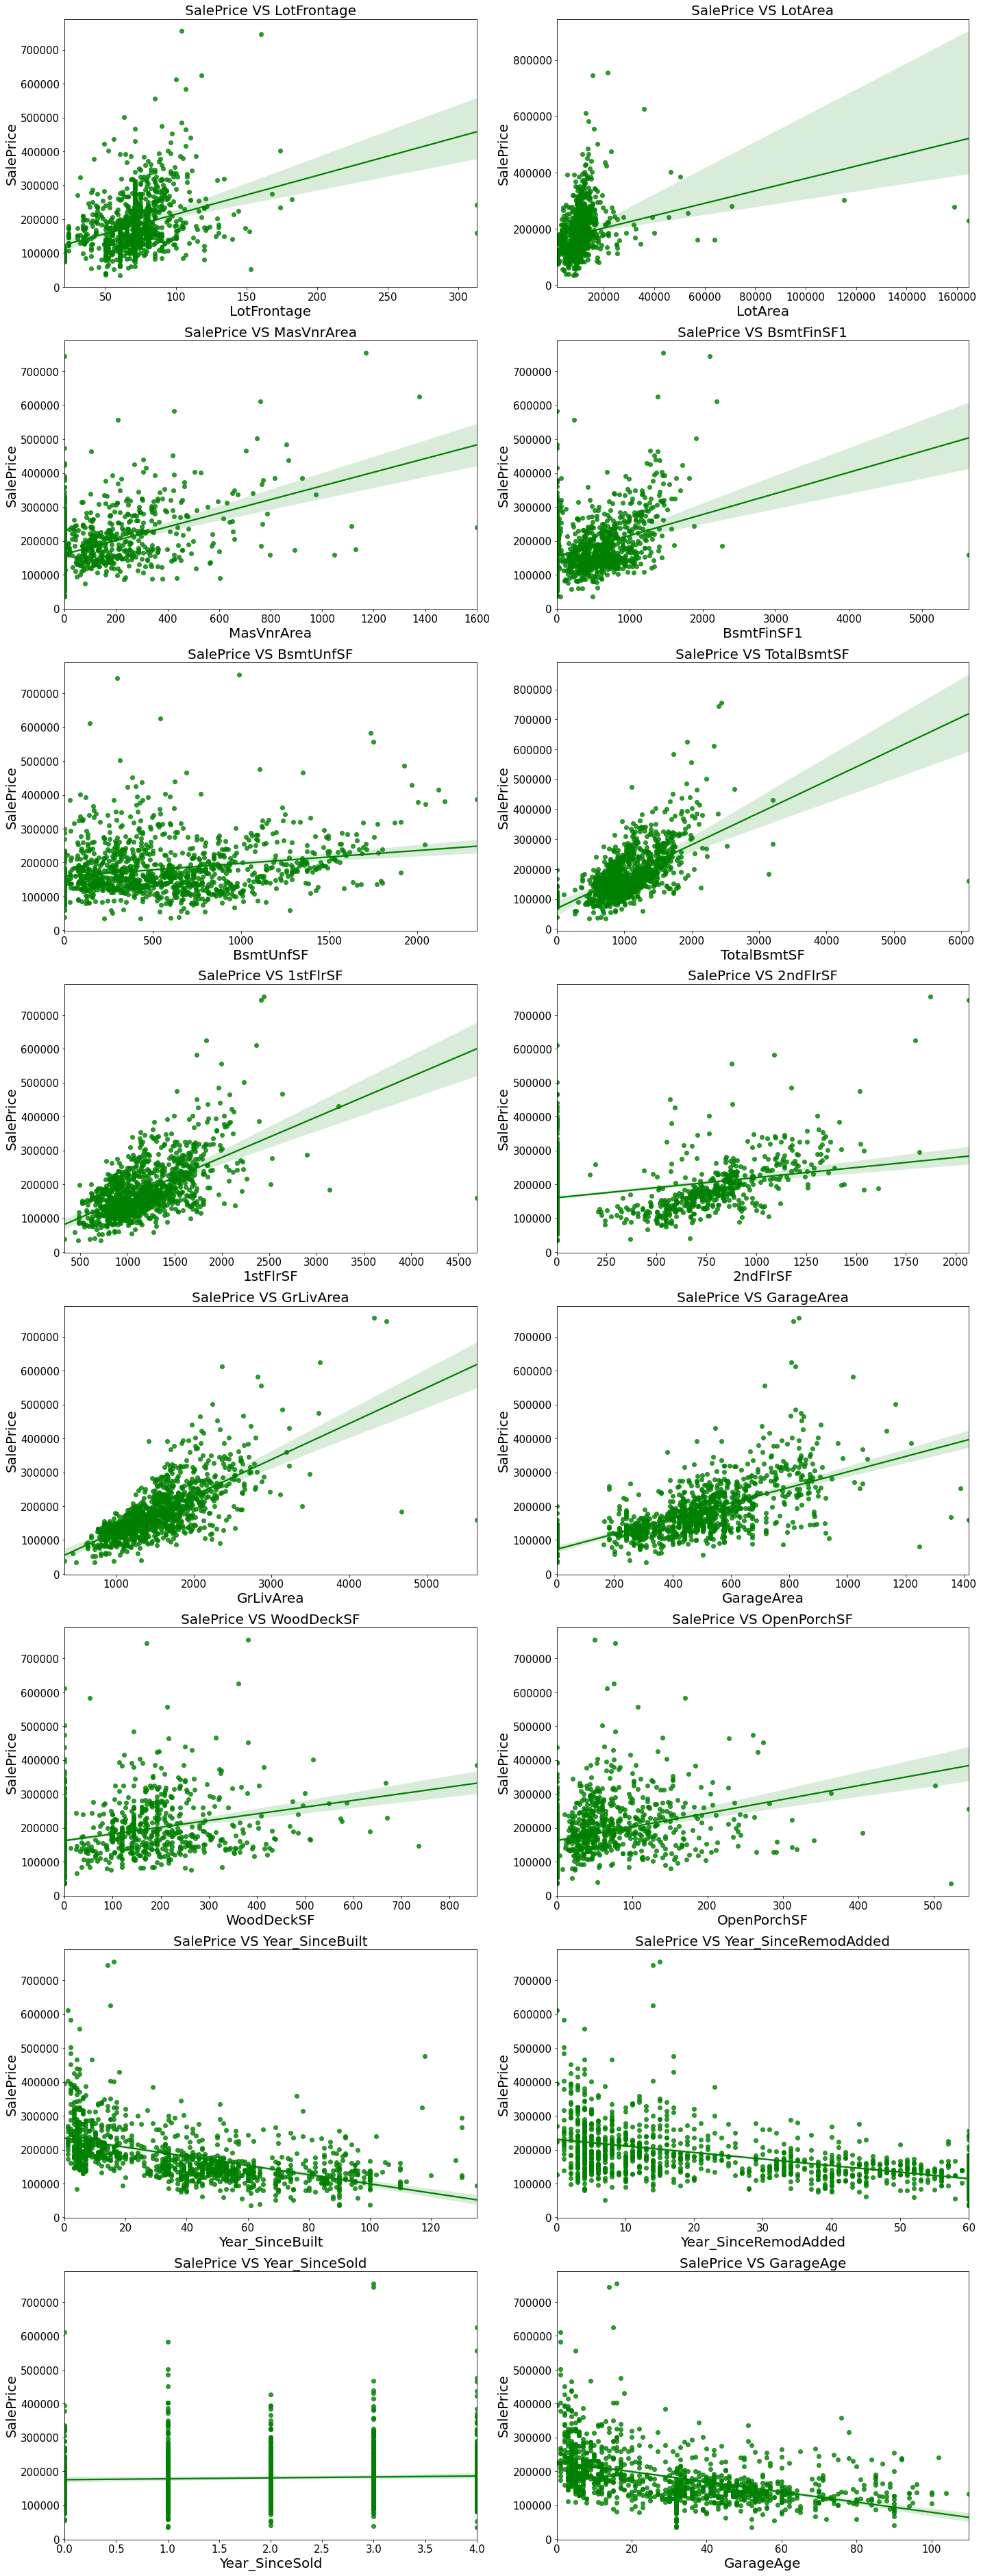

In [104]:
#regplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="g")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

In [105]:
col1=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','Year_SinceSold']

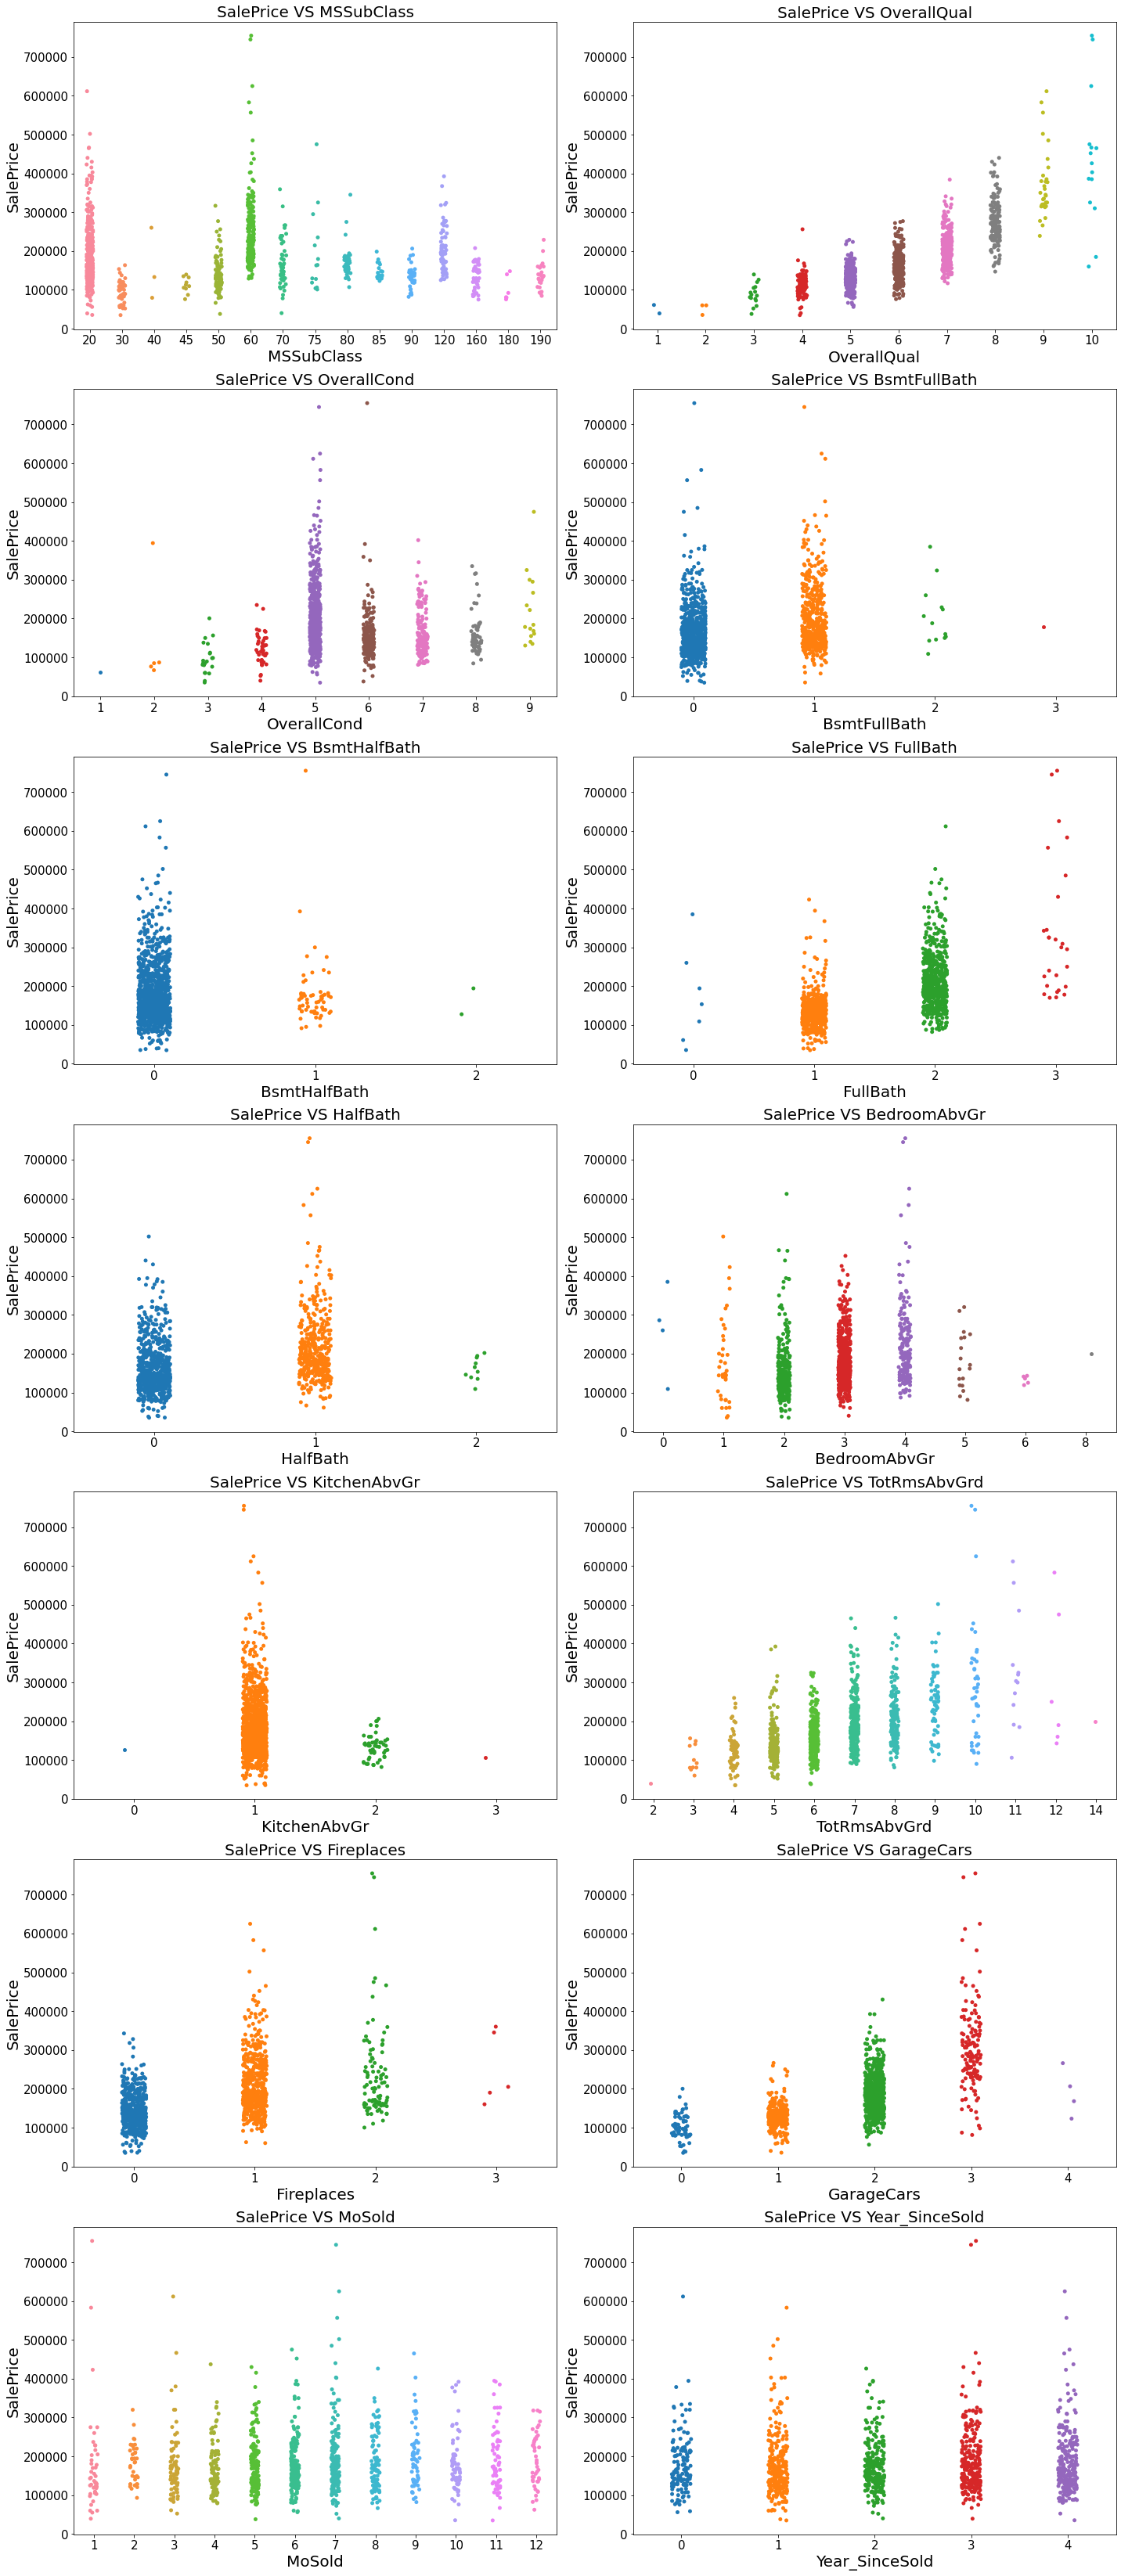

In [106]:
#stripplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col1)):
    plt.subplot(20,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['SalePrice'])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

### Bivariate Analysis for Categorical Columns:

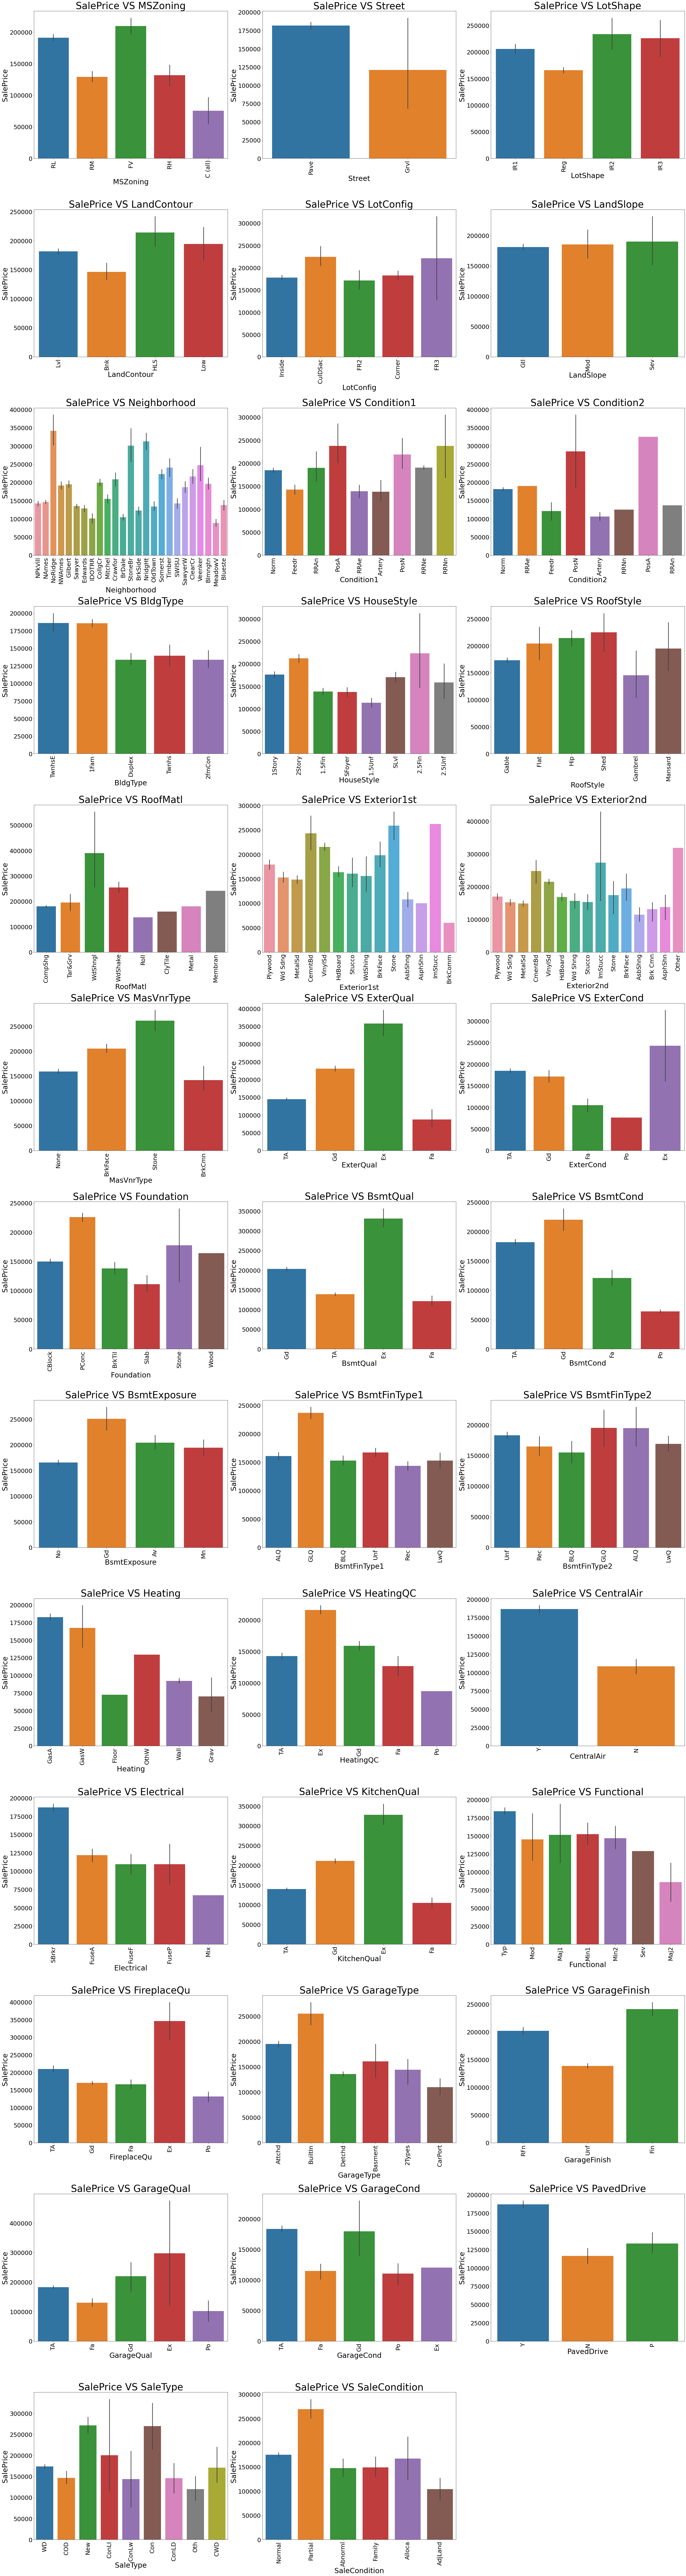

In [107]:
#Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(categorical_columns)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=df['SalePrice'],x=df[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

### Checking for outliers:

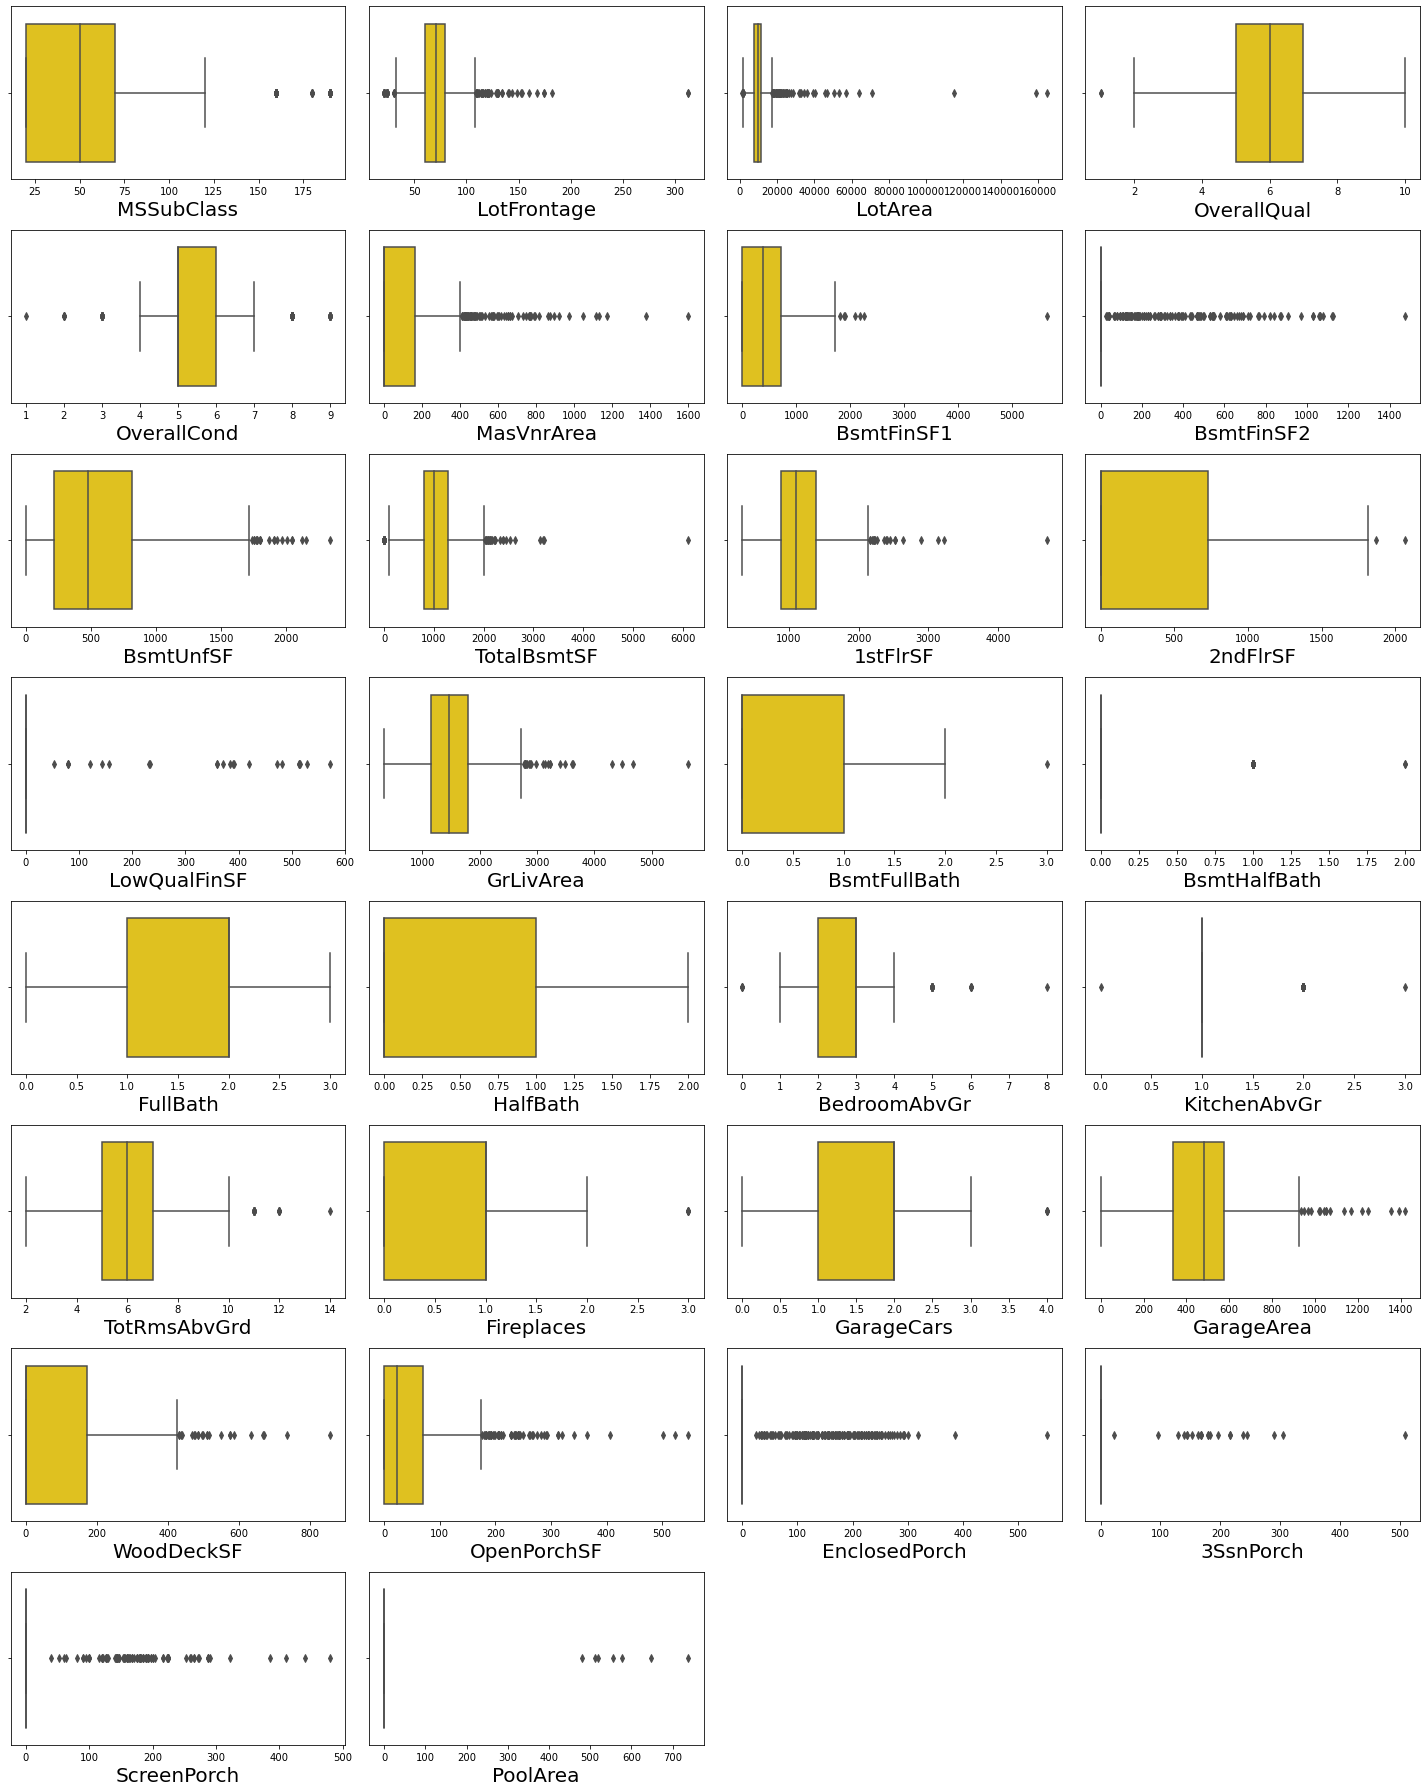

In [108]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


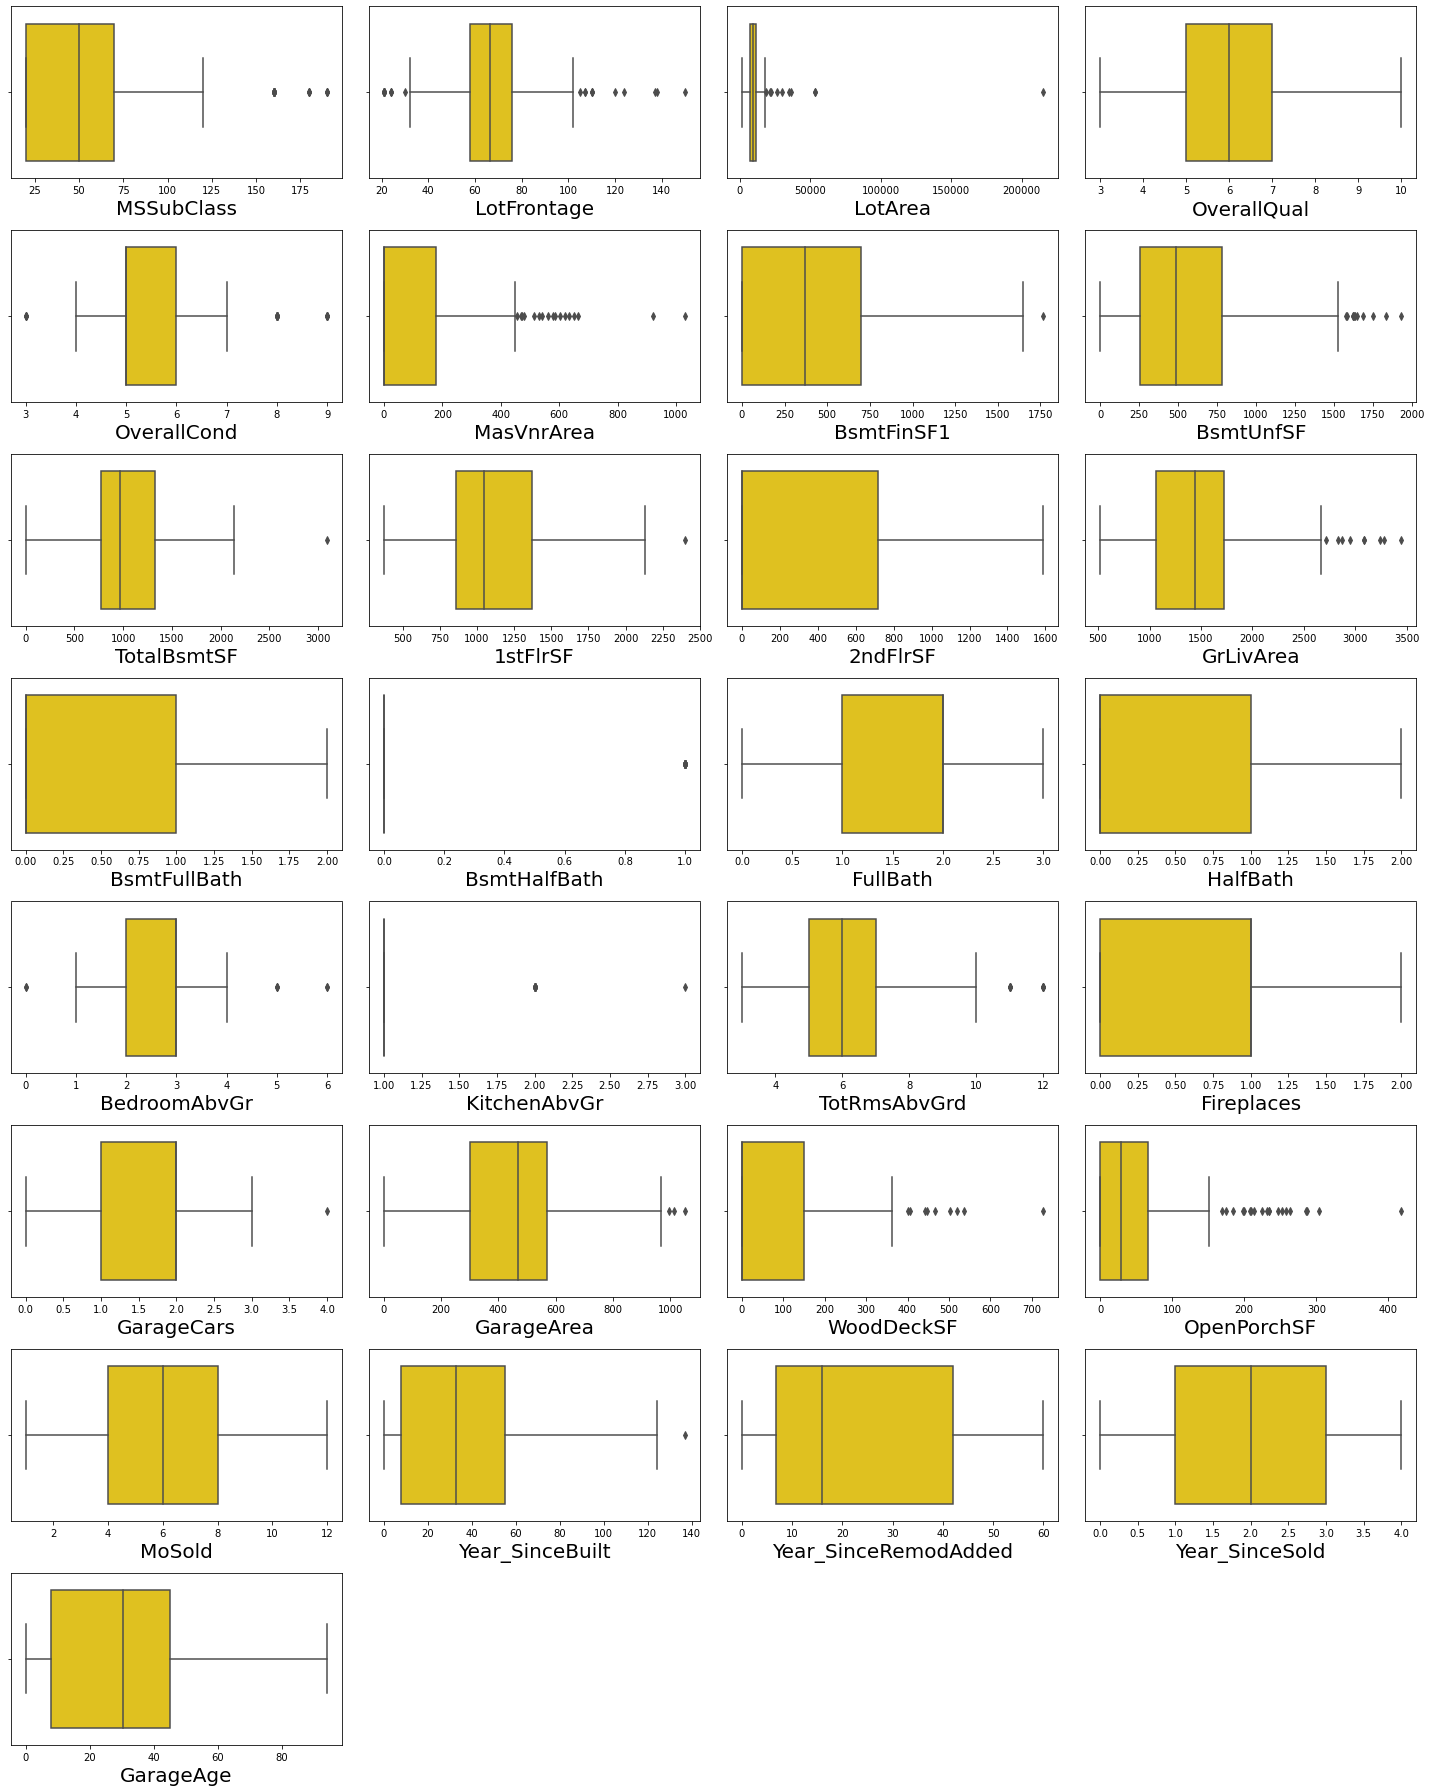

In [109]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Removing Outliers in train dataset:


i) Zscore method:

In [111]:
#Features having outliers in train dataset
features=df[['LotFrontage','LotArea','MasVnrArea',
             'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtFullBath','BedroomAbvGr',
             'KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]
             

In [113]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
4          20       RL     70.98847    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
4            6            7     Gable  CompShg     CemntBd     CmentBd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       480.0        TA        TA     CBlock       Gd       TA   
4      Stone       126.0        Gd        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          ALQ         120          Unf           0        958   
1           Gd          ALQ         351          Rec         823       1043   
2           Av          GLQ         862          Unf           0        255   
3           No          BLQ         705          Unf           0       1139   
4           No          ALQ        1246          Unf           0        356   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0         1078    GasA        TA          Y      SBrkr       958         0   
1         2217    GasA        Ex          Y      SBrkr      2217         0   
2         1117    GasA        Ex          Y      SBrkr      1127       886   
3         1844    GasA        Ex          Y      SBrkr      1844         0   
4         1602    GasA        Gd          Y      SBrkr      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
4             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          TA     Attchd          RFn           2         440   
1           1          TA     Attchd          Unf           2         621   
2           1          TA     Attchd          Unf           2         455   
3           1  

In [114]:
#Checking shape of new train dataset
df_new.shape

(1012, 75)

In [115]:
#Checking shape of old train dataset
df.shape

(1168, 75)

In [ ]:
#Checking dataloss in zscore method of train dataset
Dataloss = (((1168-953)/1168)*100)
Dataloss

In [ ]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
#Checking shape of new train dataset
df_1.shape

In [ ]:
#Checking shape of old train dataset
df.shape

In [ ]:
#Checking dataloss in IQR method of train dataset
Dataloss = (((1168-780)/1168)*100)
Dataloss

iii) Percentile Method:

In [116]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

### Removing Outliers in test dataset:


i) Zscore method:


In [117]:
#Features having outliers in test dataset
features1=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]


In [118]:
from scipy.stats import zscore
z=np.abs(zscore(features1))
dff_new=dff[(z<3).all(axis=1)]
dff_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            9            5       Hip  CompShg     VinylSd     VinylSd   
1            8            5     Gable  CompShg     HdBoard     HdBoard   
2            8            5       Hip  CompShg     VinylSd     VinylSd   
3            7            7     Gable  CompShg     MetalSd     MetalSd   
4            6            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0      Stone       200.0        Gd        TA      PConc       Ex       TA   
1       None         0.0        Gd        TA     CBlock       Gd       TA   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     CBlock       TA       TA   
4      Stone        74.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           Gd          GLQ        1249          Unf        673         1922   
1           Av          GLQ        1036          Unf        184         1220   
2           Av          Unf           0          Unf       1753         1753   
3           No          Rec         275          Unf        429          704   
4           Mn          Unf           0          Unf        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr      1922         0       1922   
1    GasA        Gd          Y      SBrkr      1360         0       1360   
2    GasA        Ex          Y      SBrkr      1788         0       1788   
3    GasA        Ex          Y      SBrkr       860       704       1564   
4    GasA        Ex          Y      SBrkr       894      1039       1933   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           1          Gd     Attchd   
1          Gd             4        Typ           1          Ex     Attchd   
2          Ex             7        Typ           1          TA     Attchd   
3          Fa             7        Typ           1          Gd     Attchd   
4          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Fin           3         676         TA         TA          Y   
1          RFn           2         565         TA         TA          Y   
2          RFn           2         522      

In [119]:
#Checking shape of new test dataset
dff_new.shape


(235, 67)

In [120]:
#Checking shape of old test dataset
dff.shape


(292, 67)

In [121]:
#Checking dataloss in zscore method of test dataset
Dataloss1 = (((292-235)/292)*100)
Dataloss1

19.52054794520548

ii) IQR method:

In [122]:
# 1st quantile
Q1=features1.quantile(0.25)

# 3rd quantile
Q3=features1.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [123]:
#Checking shape of new test dataset
dff_1.shape

(185, 67)

In [126]:
#Checking shape of old test dataset
dff.shape

(292, 67)

In [125]:
#Checking dataloss in IQR method of test dataset
Dataloss1 = (((292-185)/292)*100)
Dataloss1

36.64383561643836

iii) Percentile Method:

In [124]:
#Removing outliers using percentile method in test dataset
for col1 in features1:
    if dff[col1].dtypes != 'object':
        percentile = dff[col1].quantile([0.01,0.98]).values
        dff[col][dff[col]<=percentile[0]]=percentile[0]
        dff[col][dff[col]>=percentile[1]]=percentile[1]

In [ ]:
I have successfully removed outliers in test dataset using percentile method

### Checking for skewness:

In [127]:
#Checking for skewness of train dataset
df.skew()

MSSubClass               1.422019
LotFrontage              0.188060
LotArea                  1.191912
OverallQual              0.175082
OverallCond              0.580714
MasVnrArea               1.873138
BsmtFinSF1               0.639523
BsmtFinSF2               4.365829
BsmtUnfSF                0.777624
TotalBsmtSF              0.166773
1stFlrSF                 0.645842
2ndFlrSF                 0.823479
LowQualFinSF             8.666142
GrLivArea                0.592755
BsmtFullBath             0.355224
BsmtHalfBath             4.264403
FullBath                 0.057809
HalfBath                 0.656492
BedroomAbvGr            -0.145762
KitchenAbvGr             4.374289
TotRmsAbvGrd             0.443931
Fireplaces               0.671966
GarageCars              -0.434745
GarageArea              -0.135675
WoodDeckSF               1.053617
OpenPorchSF              1.513678
EnclosedPorch            3.043610
3SsnPorch                9.770611
ScreenPorch              4.105741
PoolArea      

In [ ]:
The columns with skewness in train dataset

MSSubClass
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtUnfSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtHalfBath
HalfBath
KitchenAbvGr
Fireplaces
WoodDeckSF
OpenPorchSF
SalePrice
GarageAge
But as SalePrice is my target i should not remove skewness in this column.And MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In [ ]:
#Checking for skewness of test dataset
dff.skew()

In [ ]:
The columns with skewness in test dataset

MSSubClass
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtUnfSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtHalfBath
HalfBath
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
WoodDeckSF
OpenPorchSF
Year_SinceBuilt
Year_SinceRemodAdded
MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In GarageAge skewness is zero which means all the entries in this column are same so let me drop it in test dataset. Since i'm dropping in test i should drop in train also.

In [128]:
#Dropping unnecessary column in train dataset
df = df.drop(["GarageAge"],axis=1)

In [129]:
#Dropping unnecessary column in test dataset
dff = dff.drop(["GarageAge"],axis=1)

### Removing skewness using yeo-johnson method for train dataset:

In [139]:
#Creating a list of skewed features in train dataset
fea=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces',
     'WoodDeckSF','OpenPorchSF']

In [140]:
fea

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF']

In [141]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [142]:
df[fea] = scaler.fit_transform(df[fea].values)

In [143]:
#Checking skewness again in train dataset
df[fea].skew()

LotArea         0.026776
MasVnrArea      0.391430
BsmtFinSF1     -0.163332
BsmtUnfSF      -0.012801
1stFlrSF       -0.024144
2ndFlrSF        0.276140
GrLivArea       0.008998
BsmtHalfBath    3.954345
HalfBath        0.494973
KitchenAbvGr    4.374289
Fireplaces      0.065429
WoodDeckSF      0.099245
OpenPorchSF     0.004264
dtype: float64

In [144]:
#Dropping unnecessary column
df = df.drop(["KitchenAbvGr"],axis=1)

### Removing skewness using yeo-johnson method for test dataset:

In [155]:
#Creating a list of skewed features in test dataset
fea1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr',
      'TotRmsAbvGrd','Fireplaces', 'WoodDeckSF','OpenPorchSF','Year_SinceBuilt']
 


In [156]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [157]:
dff[fea1] = scaler.fit_transform(dff[fea1].values)

In [158]:
#Checking skewness again in test dataset
dff[fea1].skew()

LotArea            0.336931
MasVnrArea         0.336374
BsmtFinSF1        -0.135773
BsmtUnfSF          0.003097
1stFlrSF          -0.057381
2ndFlrSF           0.280547
GrLivArea          0.043429
BsmtHalfBath       3.544994
HalfBath           0.619701
KitchenAbvGr       4.253608
TotRmsAbvGrd      -0.000469
Fireplaces         0.060292
WoodDeckSF         0.191121
OpenPorchSF       -0.006320
Year_SinceBuilt    0.000000
dtype: float64

In [159]:
#Dropping unnecessary column
dff = dff.drop(["KitchenAbvGr"],axis=1)

### Ordinal Encoding:

In [160]:
#Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [161]:
#Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    dff[i] = dff[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [162]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [163]:
#Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dff.columns:
    if dff[i].dtypes=='object':
        dff[i]=OE.fit_transform(dff[i].values.reshape(-1,1))

In [164]:
I have encoded all my categorical columns in train and test datasets using Ordinal encoder.

SyntaxError: invalid syntax (<ipython-input-164-44ba4fc3b56a>, line 1)

### Checking correlation using heat map:

In [165]:
#Correlation of train dataset
cor=df.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.391424 -0.404514 -0.035981   
MSZoning                0.007478  1.000000    -0.084834 -0.059497  0.140215   
LotFrontage            -0.391424 -0.084834     1.000000  0.598263 -0.044573   
LotArea                -0.404514 -0.059497     0.598263  1.000000 -0.072131   
Street                 -0.035981  0.140215    -0.044573 -0.072131  1.000000   
LotShape                0.104485  0.053655    -0.157341 -0.287130 -0.012941   
LandContour            -0.021387  0.001175    -0.016620 -0.073699  0.105226   
LotConfig               0.076880 -0.027246    -0.201691 -0.198884  0.000153   
LandSlope              -0.014930 -0.023952     0.023253  0.174293 -0.141572   
Neighborhood            0.013918 -0.251833     0.091671  0.076420  0.001420   
Condition1             -0.042474 -0.025651    -0.022579  0.069277  0.002189   
Condition2             -0.044319  0.031959     0.011970  0.056341  0.001406   
BldgType                0.731815 -0.024776    -0.467073 -0.528158 -0.013606   
HouseStyle              0.381585 -0.110991     0.057902  0.004752  0.016793   
OverallQual             0.070462 -0.134037     0.230687  0.189926  0.057140   
OverallCond            -0.056978  0.189553    -0.051887  0.010419  0.031082   
RoofStyle              -0.100641  0.000913     0.168101  0.120031 -0.006875   
RoofMatl               -0.032214  0.009719     0.063294  0.218490  0.007889   
Exterior1st            -0.090178 -0.012037     0.079942  0.079623  0.012482   
Exterior2nd            -0.120022  0.005548     0.108934  0.096323  0.014618   
MasVnrType             -0.013252 -0.033521    -0.066054 -0.019975  0.000822   
MasVnrArea              0.023116 -0.037341     0.159916  0.070534  0.019397   
ExterQual               0.032564 -0.160447     0.158712  0.097437  0.091807   
ExterCond              -0.051385  0.097907    -0.001004  0.070139 -0.028096   
Foundation              0.053951 -0.244844     0.090652  0.009380  0.032701   
BsmtQual                0.070818 -0.206193     0.163680  0.115346  0.027107   
BsmtCond               -0.009496 -0.041842     0.047333  0.047177  0.002199   
BsmtExposure           -0.068192  0.037414    -0.121117 -0.144184  0.065253   
BsmtFinType1            0.017515  0.021518    -0.028977 -0.043101 -0.006420   
BsmtFinSF1             -0.045552 -0.037742     0.105209  0.145436  0.002821   
BsmtFinType2            0.040573 -0.031322    -0.015941 -0.073763  0.045208   
BsmtFinSF2             -0.062403  0.027055     0.011048  0.089430  0.003550   
BsmtUnfSF              -0.134567 -0.033423     0.134432  0.057487  0.029603   
TotalBsmtSF            -0.229300 -0.065060     0.318263  0.332243  0.016841   
Heating                 0.047734  0.051188    -0.036713 -0.020813  0.006981   
HeatingQC               0.005480 -0.149446     0.084699  0.047297  0.038560   
CentralAir             -0.113883 -0.015887     0.087970  0.073440  0.043024   
Electrical              0.045533 -0.079205     0.073880  0.053135  0.038720   
1stFlrSF               -0.265289 -0.037650     0.395509  0.453550  0.009855   
2ndFlrSF                0.355949 -0.014146    -0.041342  0.005011  0.024647   
LowQualFinSF            0.053737  0.012098    -0.004546  0.004767  0.007352   
GrLivArea               0.096288 -0.086578     0.318541  0.397866  0.052679   
BsmtFullBath           -0.011290 -0.009900     0.070859  0.108391 -0.010398   
BsmtHalfBath           -0.000125  0.006809     0.011408  0.043135  0.013997   
FullBath                0.140807 -0.188837     0.180823  0.186797  0.033208   
HalfBath                0.165331 -0.125476     0.049698  0.060784  0.045903   
BedroomAbvGr           -0.037908 -0.000610     0.278173  0.298929  0.028722   
KitchenQual             0.019462 -0.133170     0.158665  0.126523  0.068306   
TotRmsAbvGrd            0.049001 -0.024508     0.323070  0.369884  0.039782   
Functional              0.022913 -0.091684     0.037977 -0.024442 -0.015

In [167]:
#Correlation of test dataset
cor=dff.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.544258  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.329507 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.617252 -0.056531   
LotArea                -0.544258 -0.329507     0.617252  1.000000 -0.102578   
Street                  0.004588 -0.063162    -0.056531 -0.102578  1.000000   
LotShape                0.176681  0.167716    -0.147720 -0.292178 -0.002444   
LandContour             0.068736 -0.099137    -0.086163 -0.143178  0.153613   
LotConfig               0.071784  0.055261    -0.124470 -0.149646  0.058229   
LandSlope              -0.073979 -0.035312     0.176406  0.449335 -0.324146   
Neighborhood           -0.081962 -0.204984     0.184817  0.183937 -0.045972   
Condition1              0.042599 -0.059909     0.064350  0.058483 -0.246714   
Condition2             -0.036770  0.105995    -0.018887 -0.035223  0.004868   
BldgType                0.798007  0.230251    -0.436593 -0.574661 -0.028820   
HouseStyle              0.455233 -0.068366    -0.080950 -0.076090  0.043073   
OverallQual            -0.116077 -0.276394     0.254760  0.216067  0.066173   
OverallCond            -0.068113  0.191126    -0.096571 -0.101331  0.077702   
RoofStyle              -0.183492 -0.031210     0.199222  0.237028 -0.054925   
RoofMatl               -0.019367 -0.022604     0.077308  0.034220  0.006540   
Exterior1st            -0.103303 -0.028611     0.018168  0.058948 -0.021532   
Exterior2nd            -0.202425 -0.028994     0.035881  0.079077 -0.019729   
MasVnrType             -0.092343  0.010358     0.055159 -0.001781  0.036783   
MasVnrArea              0.044899 -0.126757     0.105163  0.052782 -0.014428   
ExterQual              -0.047717 -0.327079     0.185375  0.167043  0.128016   
ExterCond              -0.120495  0.065494    -0.072894 -0.025614  0.024868   
Foundation              0.072808 -0.195382     0.130965  0.073471  0.043091   
BsmtQual                0.099330 -0.219848     0.162885  0.115399  0.009123   
BsmtCond                0.016528 -0.139784     0.043670  0.045998  0.003768   
BsmtExposure           -0.049358  0.050552    -0.114149 -0.178207  0.099047   
BsmtFinType1            0.003453  0.038716    -0.007482 -0.002502 -0.037657   
BsmtFinSF1             -0.101624 -0.147745     0.115057  0.179755 -0.036987   
BsmtFinType2            0.043449 -0.015825    -0.115149 -0.009037  0.110019   
BsmtUnfSF              -0.193033 -0.138246     0.159380  0.108895  0.091801   
TotalBsmtSF            -0.336822 -0.270929     0.398795  0.410420 -0.029632   
Heating                 0.049709  0.094397     0.011852  0.063391  0.011782   
HeatingQC              -0.116916 -0.225763     0.098609  0.064279  0.060962   
CentralAir             -0.053192 -0.235065     0.031703  0.063166  0.156680   
Electrical              0.075568 -0.035888     0.020348  0.001084 -0.025961   
1stFlrSF               -0.393892 -0.227985     0.458016  0.493159 -0.012832   
2ndFlrSF                0.402186  0.020132    -0.083505 -0.052793  0.072320   
GrLivArea               0.030607 -0.210428     0.347979  0.400614  0.050517   
BsmtFullBath           -0.000676 -0.084559     0.085464  0.153815 -0.094062   
BsmtHalfBath           -0.041577 -0.017534    -0.044632  0.068102  0.021908   
FullBath                0.095903 -0.236326     0.227718  0.213198  0.087362   
HalfBath                0.210365 -0.181860     0.031487  0.071574 -0.025530   
BedroomAbvGr           -0.061750 -0.104881     0.227534  0.305997  0.030347   
KitchenQual            -0.134592 -0.266916     0.181377  0.137878  0.058313   
TotRmsAbvGrd           -0.031809 -0.153357     0.330815  0.398884  0.067617   
Functional             -0.075457 -0.131738    -0.002318  0.045528 -0.018670   
Fireplaces             -0.073941 -0.170555     0.256724  0.295285 -0.026253   
FireplaceQu            -0.083281  0.050584     0.000598  0.021918  0.033

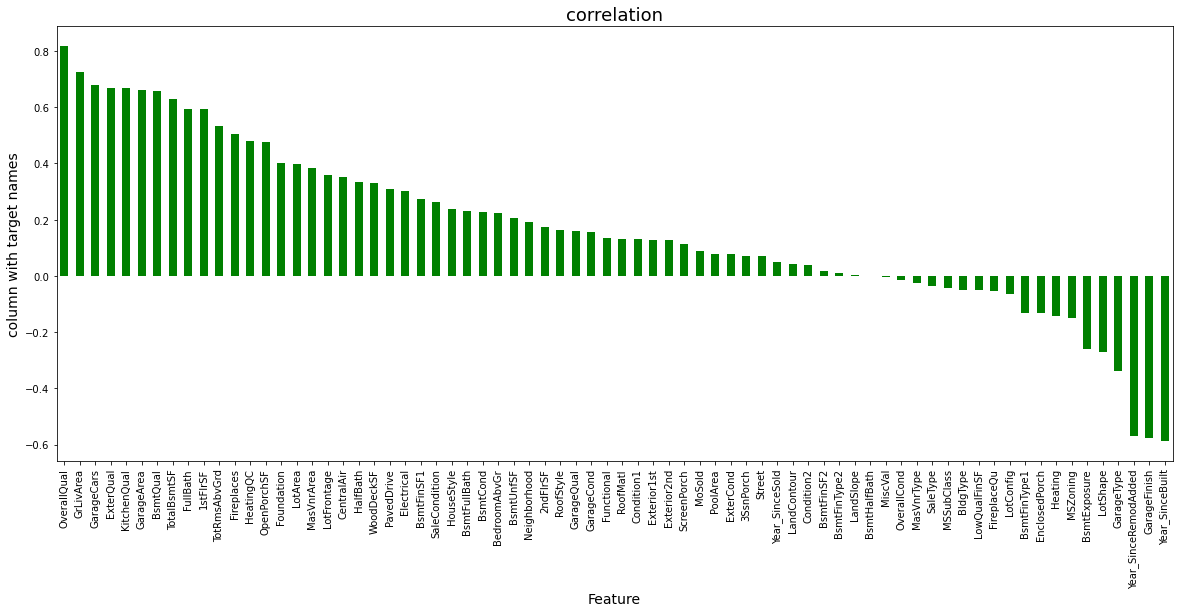

In [170]:
plt.figure(figsize=(20,8))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Separating features and label in train dataset:

In [171]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

### Scaling the train data using standard scaler:

In [172]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [173]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.039092 -1.311302  0.058621 -1.373107   
1   -0.877042 -0.021646     1.321126  1.350999  0.058621 -1.373107   
2    0.077095 -0.021646     1.160948  0.118851  0.058621 -1.373107   
3   -0.877042 -0.021646     1.855050  0.534813  0.058621 -1.373107   
4   -0.877042 -0.021646     0.039092  1.489919  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.826791  -0.700004  -0.223988   
1     1.079014     1.050880    0.395209   -0.826791   1.032209   2.589114   
2    -0.535912    -0.682775    0.395209   -0.826791   1.032209  -0.223988   
3    -0.212927    -0.104890   -1.241686    1.299726  -0.700004  -0.223988   
4    -1.504868    -1.549602    2.032104    1.178763   1.032209  -0.223988   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836  0.647378 -0.037507      0.635539     -1.523529   -0.364169   
1    0.852451 -0.832343  3.332324     -1.113129     -1.523529    0.213152   
2    0.852451  0.647378 -0.037507     -1.987463     -0.434828    0.992425   
3   -0.557836  0.647378 -0.037507      0.635539     -0.979178    0.788644   
4   -0.557836  0.647378 -0.037507      0.635539     -1.523529    1.417817   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0      0.310141   -0.285392   0.922536     0.067300 -0.11909  -1.178317   
1     -0.771186    4.749787   1.067993     2.453434 -0.11909   0.903792   
2      0.310141   -0.285392  -0.563551     0.165553 -0.11909   0.903792   
3      0.310141   -0.285392   1.226973     1.997087 -0.11909   0.903792   
4      0.310141   -0.285392  -0.298282     1.387415 -0.11909  -0.137262   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0    0.267506    0.299036 -0.477812 -0.872348     -0.125418  -1.279119   
1    0.267506    0.299036  2.065884 -0.872348     -0.125418   1.380781   
2    0.267506    0.299036  0.054363  1.165490     -0.125418   1.061459   
3    0.267506    0.299036  1.655696 -0.872348     -0.125418   0.774305   
4    0.267506    0.299036  1.199105 -0.872348     -0.125418   0.319539   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0     -0.838227     -0.238775  0.793082 -0.783050     -1.144966    -0.788838   
1      1.192995     -0.238775  0.793082 -0.783050      1.475072     0.716657   
2      1.192995     -0.238775  0.793082  1.273843      0.165053    -0.788838   
3     -0.838227     -0.238775  0.793082 -0.783050      0.165053    -0.788838   
4     -0.838227      4.188040  0.793082 -0.783050      0.165053     0.716657   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0     -1.009429    0.261146     0.78698    -1.163409   -0.693653   
1      0.975397    0.261146     0.78698    -1.163409   -0.693653   
2      0.975397    0.261146     0.78698    -1.163409   -0.693653   
3      0.313788    0.261146     0.78698    -1.163409   -0.693653   
4      0.975397    0.2611

### Scaling the test data using standard scaler:

In [174]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

In [ ]:
This is the train data after scaling.

### Checking for multicolinearity issue in train dataset using VIF:

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.205705            MSSubClass
1       1.357883              MSZoning
2       2.036724           LotFrontage
3       2.673228               LotArea
4       1.113028                Street
5       1.297607              LotShape
6       1.350647           LandContour
7       1.151868             LotConfig
8       1.461533             LandSlope
9       1.260704          Neighborhood
10      1.154615            Condition1
11      1.112708            Condition2
12      5.124906              BldgType
13      2.473155            HouseStyle
14      4.249776           OverallQual
15      2.140683           OverallCond
16      1.269538             RoofStyle
17      1.212254              RoofMatl
18      4.345039           Exterior1st
19      4.339125           Exterior2nd
20      1.554645            MasVnrType
21      1.986993            MasVnrArea
22      3.281965             ExterQual
23      1.316119             ExterCond
24      2.134078            Foundation
25      3.249520              BsmtQual
26      1.255880              BsmtCond
27      1.575361          BsmtExposure
28      2.907540          BsmtFinType1
29     10.784081            BsmtFinSF1
30      2.370083          BsmtFinType2
31      3.352361            BsmtFinSF2
32      8.893868             BsmtUnfSF
33     11.705265           TotalBsmtSF
34      1.323373               Heating
35      1.907169             HeatingQC
36      1.714160            CentralAir
37      1.384487            Electrical
38     14.502619              1stFlrSF
39     14.261971              2ndFlrSF
40      1.384466          LowQualFinSF
41     22.813311             GrLivArea
42      2.306359          BsmtFullBath
43      1.240972          BsmtHalfBath
44      3.110701              FullBath
45      2.505349              HalfBath
46      2.699885          BedroomAbvGr
47      2.803883           KitchenQual
48      4.756001          TotRmsAbvGrd
49      1.245610            Functional
50      2.206490            Fireplaces
51      1.567651           FireplaceQu
52      1.776293            GarageType
53      2.078152          GarageFinish
54      6.519740            GarageCars
55      6.392799            GarageArea
56      1.794724            GarageQual
57      1.829209            GarageCond
58      1.526069            PavedDrive
59      1.345481            WoodDeckSF
60      1.620292           OpenPorchSF
61      1.336056         EnclosedPorch
62      1.067523             3SsnPorch
63      1.153570           ScreenPorch
64      1.115877              PoolArea
65      1.081792               MiscVal
66      1.091829                MoSold
67      1.123589              SaleType
68      1.197923         SaleCondition
69      8.296260       Year_SinceBuilt
70      3.012082  Year_SinceRemodAdded
71      1.098938        Year_SinceSold

In [177]:
#Droping high VIF columns
X = X.drop(["GrLivArea"],axis=1)

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.170563            MSSubClass
1       1.357155              MSZoning
2       2.031899           LotFrontage
3       2.669601               LotArea
4       1.107183                Street
5       1.296670              LotShape
6       1.348562           LandContour
7       1.151764             LotConfig
8       1.455360             LandSlope
9       1.259732          Neighborhood
10      1.154204            Condition1
11      1.111307            Condition2
12      5.080329              BldgType
13      2.369374            HouseStyle
14      4.244055           OverallQual
15      2.138452           OverallCond
16      1.266319             RoofStyle
17      1.211529              RoofMatl
18      4.338846           Exterior1st
19      4.328777           Exterior2nd
20      1.547651            MasVnrType
21      1.986825            MasVnrArea
22      3.281880             ExterQual
23      1.313980             ExterCond
24      2.116028            Foundation
25      3.246465              BsmtQual
26      1.255758              BsmtCond
27      1.572353          BsmtExposure
28      2.907336          BsmtFinType1
29     10.784068            BsmtFinSF1
30      2.369260          BsmtFinType2
31      3.347047            BsmtFinSF2
32      8.893779             BsmtUnfSF
33     11.667456           TotalBsmtSF
34      1.321695               Heating
35      1.906045             HeatingQC
36      1.702270            CentralAir
37      1.382884            Electrical
38      6.434100              1stFlrSF
39      5.702739              2ndFlrSF
40      1.183255          LowQualFinSF
41      2.306355          BsmtFullBath
42      1.238416          BsmtHalfBath
43      2.929339              FullBath
44      2.412287              HalfBath
45      2.661244          BedroomAbvGr
46      2.803686           KitchenQual
47      4.411674          TotRmsAbvGrd
48      1.239787            Functional
49      2.152031            Fireplaces
50      1.556853           FireplaceQu
51      1.776240            GarageType
52      2.070625          GarageFinish
53      6.517186            GarageCars
54      6.351469            GarageArea
55      1.778393            GarageQual
56      1.828438            GarageCond
57      1.525432            PavedDrive
58      1.345105            WoodDeckSF
59      1.611322           OpenPorchSF
60      1.317706         EnclosedPorch
61      1.065032             3SsnPorch
62      1.153033           ScreenPorch
63      1.106260              PoolArea
64      1.081244               MiscVal
65      1.090158                MoSold
66      1.121722              SaleType
67      1.197917         SaleCondition
68      8.275377       Year_SinceBuilt
69      3.010009  Year_SinceRemodAdded
70      1.098355        Year_SinceSold

### Checking for multicolinearity issue in test dataset using VIF:

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      14.090225            MSSubClass
1       1.820778              MSZoning
2       2.273493           LotFrontage
3       4.249247               LotArea
4       1.512404                Street
5       1.660411              LotShape
6       1.588610           LandContour
7       1.348900             LotConfig
8       2.248646             LandSlope
9       1.514635          Neighborhood
10      1.334729            Condition1
11      1.462726            Condition2
12      8.504501              BldgType
13      3.581895            HouseStyle
14      5.582769           OverallQual
15      2.656231           OverallCond
16      1.611961             RoofStyle
17      1.296189              RoofMatl
18      4.969062           Exterior1st
19      5.172817           Exterior2nd
20      2.137190            MasVnrType
21      2.512358            MasVnrArea
22      4.634374             ExterQual
23      1.644896             ExterCond
24      2.436952            Foundation
25      4.230995              BsmtQual
26      1.364622              BsmtCond
27      2.183502          BsmtExposure
28      2.973445          BsmtFinType1
29     10.873518            BsmtFinSF1
30      1.831011          BsmtFinType2
31      9.664425             BsmtUnfSF
32     16.222090           TotalBsmtSF
33      2.134187               Heating
34      2.272262             HeatingQC
35      2.622293            CentralAir
36      1.656977            Electrical
37     24.308270              1stFlrSF
38     24.857346              2ndFlrSF
39     40.585140             GrLivArea
40      2.810969          BsmtFullBath
41      1.530535          BsmtHalfBath
42      3.916214              FullBath
43      3.286744              HalfBath
44      3.146235          BedroomAbvGr
45      3.619880           KitchenQual
46      5.773776          TotRmsAbvGrd
47      1.664091            Functional
48      2.944515            Fireplaces
49      1.819440           FireplaceQu
50      2.011733            GarageType
51      2.334907          GarageFinish
52      9.071422            GarageCars
53      7.213257            GarageArea
54      2.795892            GarageQual
55      2.698487            GarageCond
56      1.916765            PavedDrive
57      1.760019            WoodDeckSF
58      1.586515           OpenPorchSF
59      1.361909                MoSold
60      1.597241              SaleType
61      1.654896         SaleCondition
62           NaN       Year_SinceBuilt
63      3.197785  Year_SinceRemodAdded
64      1.224765        Year_SinceSold

In [180]:
#Droping high VIF columns
X_1 = X_1.drop(["GrLivArea"],axis=1)

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      14.077182            MSSubClass
1       1.818266              MSZoning
2       2.255760           LotFrontage
3       4.244245               LotArea
4       1.506980                Street
5       1.660152              LotShape
6       1.588549           LandContour
7       1.341435             LotConfig
8       2.248599             LandSlope
9       1.513976          Neighborhood
10      1.333262            Condition1
11      1.460215            Condition2
12      8.427738              BldgType
13      3.304663            HouseStyle
14      5.530275           OverallQual
15      2.654909           OverallCond
16      1.606302             RoofStyle
17      1.292243              RoofMatl
18      4.962483           Exterior1st
19      5.124159           Exterior2nd
20      2.120697            MasVnrType
21      2.512081            MasVnrArea
22      4.633798             ExterQual
23      1.644429             ExterCond
24      2.425435            Foundation
25      4.204599              BsmtQual
26      1.364599              BsmtCond
27      2.182532          BsmtExposure
28      2.954106          BsmtFinType1
29     10.847068            BsmtFinSF1
30      1.820371          BsmtFinType2
31      9.503554             BsmtUnfSF
32     15.652529           TotalBsmtSF
33      2.104771               Heating
34      2.271206             HeatingQC
35      2.620156            CentralAir
36      1.656908            Electrical
37      8.489197              1stFlrSF
38      7.574672              2ndFlrSF
39      2.803034          BsmtFullBath
40      1.530068          BsmtHalfBath
41      3.762032              FullBath
42      3.161846              HalfBath
43      3.089186          BedroomAbvGr
44      3.615359           KitchenQual
45      5.488786          TotRmsAbvGrd
46      1.634324            Functional
47      2.882941            Fireplaces
48      1.794191           FireplaceQu
49      2.011483            GarageType
50      2.333327          GarageFinish
51      9.020505            GarageCars
52      7.164428            GarageArea
53      2.765090            GarageQual
54      2.681210            GarageCond
55      1.916551            PavedDrive
56      1.759197            WoodDeckSF
57      1.583830           OpenPorchSF
58      1.353012                MoSold
59      1.592983              SaleType
60      1.634303         SaleCondition
61           NaN       Year_SinceBuilt
62      3.191825  Year_SinceRemodAdded
63      1.221853        Year_SinceSold

### MODEL BUILDING USING TRAIN DATASET:


#### Finding Best Random State and Accuracy:

In [182]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [185]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8849818809778618  on Random_state  72


Created train test split.

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

### Regression Algorithms:

In [186]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

i) RandomForestRegressor:

In [187]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 85.91720281152158
mean_squared_error: 0.14827898940647347
mean_absolute_error: 0.2647690961325785
root_mean_squared_error: 0.38507010972870054

Cross validation score : 85.58032720983861

R2_Score - Cross Validation Score : 0.33687560168296216


ii) XGBRegressor:


In [188]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 85.56802070140189
mean_squared_error: 0.1519555580394242
mean_absolute_error: 0.2640228083218143
root_mean_squared_error: 0.3898147740137926

Cross validation score : 85.48651699208249

R2_Score - Cross Validation Score : 0.08150370931940643


iii) ExtraTreesRegressor:


In [189]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 84.87348054767234
mean_squared_error: 0.15926843137835794
mean_absolute_error: 0.2693190902428478
root_mean_squared_error: 0.3990844915282451

Cross validation score : 85.36331738647478

R2_Score - Cross Validation Score : -0.48983683880243234


In [ ]:
ExtraTreesRegressor is giving me 84.87% r2_score.

iv) GradientBoostingRegressor:


In [190]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 87.96641683792474
mean_squared_error: 0.12670263771682297
mean_absolute_error: 0.2473641783987732
root_mean_squared_error: 0.35595313977660453

Cross validation score : 86.85612850468762

R2_Score - Cross Validation Score : 1.110288333237122


v) DecisionTreeRegressor:


In [191]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 64.11270018622598
mean_squared_error: 0.37786048309117753
mean_absolute_error: 0.4378660827718132
root_mean_squared_error: 0.6147035733515607

Cross validation score : 68.70342149408647

R2_Score - Cross Validation Score : -4.590721307860491


### Hyper parameter tunning for best model:

In [193]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [194]:
#Giving ETR parameters.

parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

In [195]:
#Running grid search CV for ETR.
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [ ]:
#Tunning the model using GCV.
GCV.fit(X_train,y_train)

In [ ]:
#Got the best parameters for ETR.
GCV.best_params_

In [ ]:
Best_mod=ExtraTreesRegressor(criterion='mae',max_features='sqrt',min_samples_split=2,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

### Saving the model:

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"House_Price.pkl")

In [ ]:
I have saved my model as House_Price.Using .pkl

### Predicting House Price for test dataset using Saved model of train dataset:

In [ ]:
# Loading the saved model
model=joblib.load("House_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

In [ ]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

In [ ]:
Above are the predicted values and the actual values.They are almost similar.

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

In [ ]:
#Predicting Sale price of house using cleaned test dataset X_1
Predicted_Sale_Price=model.predict(X_1)
Predicted_Sale_Price

In [ ]:
#Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

In [ ]:
#Lets save the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

In [ ]:
I have saved the predicted values as csv file.